In [2]:
from boututils.datafile import DataFile
from boutdata.collect import collect
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os, sys, pathlib
import platform
import traceback
import xarray as xr
import xbout
from pathlib import Path
import xhermes as xh
import matplotlib.pyplot as plt
import os, sys, pathlib
import numpy as np
import xarray as xr
import xhermes as xh

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))
sys.path.append(os.path.join(r'/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions/source_functions.py'))

from convergence_functions import *
from plotting_functions import *
from source_functions import *

from matplotlib.ticker import LogFormatter

sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/sdtools"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients"))
sys.path.append(os.path.join(r"/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/general_functions"))


from plotting_functions import *
from convergence_functions import * 

from hermes3.case_db import *
from hermes3.load import *
from hermes3.named_selections import *
from hermes3.plotting import *
from hermes3.grid_fields import *
from hermes3.accessors import *
from hermes3.utils import *
from hermes3.fluxes import *


# plt.style.use('ggplot')
plt.rcParams.update({'font.size': 10})
linewidth = 3
markersize = 15



# plt.style.use('ggplot')
plt.style.use('default')
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams['xtick.labelsize'] = 18
plt.rcParams['ytick.labelsize'] = 18
plt.rcParams['axes.grid'] = True
plt.rcParams.update({'font.size': 16})



%load_ext autoreload
%autoreload 2




# total time

In [369]:
fluence_300_FL = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/300%_fluence/power_and_density/FL/case_01')

In [376]:
t_conversion = fluence_300_FL['t'].attrs.get('conversion', 1.0)
print(t_conversion)



w_time_write = 3000 * 1000 * t_conversion
print(w_time_write*1e3)

1.0439684754508785e-08
31.319054263526354


# ionsation vs pump source

In [6]:
fluence_300_FL = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/300%_fluence/power_and_density/FL/case_01')

In [8]:
for var_name, data_array in fluence_300_FL.data_vars.items():
    print(f"Variable: {var_name}")
    print(data_array)
    print("\n")  # Add a new line for better readability
    
    # print(f"Dimensions: {data_array.dims}")
    # print(f"Coordinates: {list(data_array.coords)}")
    # print(f"Attributes: {data_array.attrs}")
    # print("\n")  # Add a new line for better readability

Variable: Bxy
<xarray.DataArray 'Bxy' (x: 1, y: 400)>
dask.array<concatenate, shape=(1, 400), dtype=float64, chunksize=(1, 10), chunktype=numpy.ndarray>
Coordinates:
    dx       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dy       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
    dz       (x, y) float64 dask.array<chunksize=(1, 10), meta=np.ndarray>
  * x        (x) int64 0
  * y        (y) float64 0.1945 0.5831 0.9708 1.357 ... 81.92 81.95 81.97 81.99
Attributes:
    cell_location:  CELL_CENTRE
    direction_y:    Standard
    direction_z:    Average
    source:         Coordinates
    metadata:       {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.51425755...
    options:        IncIntShear = false\t\t# type: bool, source: default\nMXG...
    geometry:       


Variable: Ed+_iz
<xarray.DataArray 'Ed+_iz' (t: 301, x: 1, y: 400, z: 1)>
dask.array<mul, shape=(301, 1, 400, 1), dtype=float64, chunksize=(301, 1, 10, 1), chunktype=numpy.ndarray>
Coord

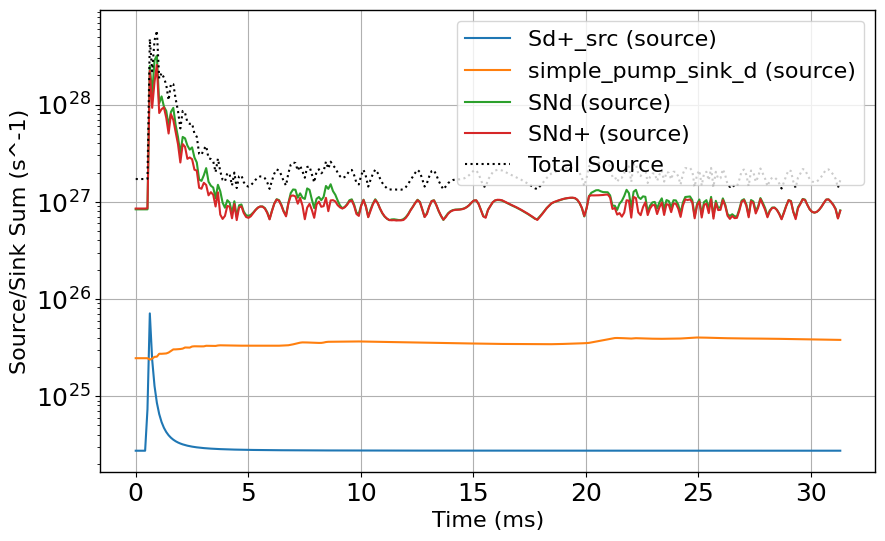

{'Sd+_src': <xarray.DataArray (t: 301, x: 1)>
 dask.array<sum-aggregate, shape=(301, 1), dtype=float64, chunksize=(301, 1), chunktype=numpy.ndarray>
 Coordinates:
   * t        (t) float64 0.2041 0.2042 0.2043 0.2044 ... 0.2352 0.2353 0.2354
   * x        (x) int64 0
     z        float64 3.142
 Attributes:
     current_time_index:  301
     cell_location:       CELL_CENTRE
     conversion:          9.57883330306608e+27
     direction_y:         Standard
     direction_z:         Standard
     long_name:           d+ external number density source
     source:              evolve_density
     species:             d+
     standard_name:       external density source
     time_dimension:      t
     units:               m^-3 s^-1
     metadata:            {'BOUT_VERSION': 5.2, 'Bnorm': 1.0, 'Cs0': 97871.514...
     options:             IncIntShear = false\t\t# type: bool, source: default...
     geometry:            
     units_type:          SI,
 'simple_pump_sink_d': <xarray.DataArray 

In [19]:
sources = ['Sd+_src', 'simple_pump_sink_d', 'SNd', 'SNd+']

sum_source(fluence_300_FL, sources = sources, plot=True, log_scale=True)

NameError: name 'tb' is not defined

# Density source analysis

In [97]:
snb_10x = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/25%_fluence_test/power_and_density/SNB/case_04_10x_density_144_rise_time')
snb_20x = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/25%_fluence_test/power_and_density/SNB/case_05_20x_density_144_rise_time')
snb_50x = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/25%_fluence_test/power_and_density/SNB/case_6_50x_density_144_rise_time')

In [114]:
snb_35x = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/25%_fluence_test/power_and_density/SNB/case_07_35x_density_144_rise_time')

In [116]:
data_dict = {'snb_10x': snb_10x, 'snb_20x': snb_20x,'snb_35x':snb_35x, 'snb_50x': snb_50x}



for key, value in data_dict.items():

    Ne = replace_guards(np.squeeze(value['Ne']))

    max = np.max(Ne[:, 0])
    min = np.min(Ne[:, 0])
    print(f'{key} max: {max}')
    print(f'{key} min: {min}')

snb_10x max: 9.743909792259557e+19
snb_10x min: 6.942722730207964e+19
snb_20x max: 1.157214780435752e+20
snb_20x min: 6.954466605004592e+19
snb_35x max: 1.4389385398938313e+20
snb_35x min: 6.977032747697955e+19
snb_50x max: 1.6857157855492175e+20
snb_50x min: 6.924483030854147e+19


# Fluence calculation

## Epsilon calculation


In [2]:
R = 1.85 
a = 0.57 
Kappa = 1.705
Bt_omp = 9.33 
Bp_omp = 2.07 

q_edge = np.square((1+Kappa**2)/2) * (a/R) * (Bt_omp/Bp_omp)
print(q_edge)

5.299645432893251


In [180]:
rise = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/base_case/FL/base_03_steady_state_this_one')

In [1]:
from scipy.integrate import simps, trapz

def f(t, tau_rise,decay = 1):
    tau = tau_rise * 0.8
    epsilon_min             = 1e-9          # Small number to avoid divide by zero in t_current
    sim_start_timestep      = 62.6381085270527e-3          # Un-normalized time of the last time step
    rise_start              = 0.5e-3          # Offset from the sim start time step
    
    t_rise                  = t[0] + rise_start  # Time of the rise midpoint
    # Calculate t_current using BOUT++'s max function
    t_current               = np.maximum(t - t_rise, epsilon_min)  # Time since ELM pulse started

    return (1 + (tau / t_current)**2) * (tau / t_current)**2 * np.exp(-decay*(tau / t_current)**2)

def elm_shape(t, tau_rise,decay = 1):
    """
    Shape of the ELM power profile.

    """
    # epsilon_min             = 1e-9
    # t               = np.maximum(t - t[0], epsilon_min)

    tau = tau_rise * 0.8
    return (1 + (tau / t)**2) * (tau / t)**2 * np.exp(-decay*(tau / t)**2)

def ELM_duration_finder(t, y, threshold_factor=0.01):
    # Ensure inputs are numpy arrays
    t = np.asarray(t)
    y = np.asarray(y)

   
    
    # Find the peak value and its index
    peak_index = np.argmax(y)
    peak_value = y[peak_index]

    # Calculate the threshold (e.g., 1% of the peak value)
    threshold = threshold_factor * peak_value

    # Search for the first index below the threshold AFTER the peak
    indices_below_threshold = np.where(y[peak_index:] <= threshold)[0]

    if len(indices_below_threshold) > 0:
        # Add peak_index to adjust for slicing
        threshold_index = peak_index + indices_below_threshold[0]
        threshold_time = t[threshold_index]
        print(f'threshold_time: {threshold_time} s')
        return threshold_time, threshold_index



def elm_power(t, tau_rise, epsilon_peak_ELM, base_power= 1e9, decay = 1):
    # Define parameters
    epsilon_min             = 1e-9
    t = np.maximum(t - t[0], epsilon_min)
    ELM_shape = elm_shape(t, tau_rise, decay)
    ELM_time, ELM_index = ELM_duration_finder(t, ELM_shape, threshold_factor=0.01)

    # Calculate the integral I over the ELM duration
    I, _ = quad(elm_shape, 1e-9, ELM_time, args=(tau_rise))

    # Calculate q_div,ELM^max
    q_0 = epsilon_peak_ELM / I
    print(f'q_0: {q_0*1e-9} GW/m^2')
    shape = elm_shape(t, tau_rise, decay)

    ELM_power = base_power + ((q_0 * shape)/2)

    prefactor = base_power/base_power * (1 + q_0 * shape/(2*base_power))
    print(f'Max ELM power: {np.max(ELM_power)*1e-9} GW/m^2')
    print(f'Max prefactor: {np.max(prefactor)}')
    return ELM_power, prefactor


tau_rise = 150e-6
# t = rise['t'].values[: 25]
t = np.linspace(0, 2e-3, 1000)
t = np.maximum(t - t[0], 1e-9)
qelm = elm_shape(t, tau_rise)

epsilon_peak_ELM = 15.502379e6 * 0.25  # replace with actual value for epsilon_peak_ELM

fig,ax = plt.subplots(1,1 , figsize=(10, 6))
tau_rise = 150e-6
for epsilon in [15.502379e6 * 0.5,15.502379e6 * 1, 15.502379e6 * 1.5, 15.502379e6 * 2, 15.502379e6 * 2.5, 15.502379e6 * 3]:
    print(f'eplison: {epsilon * 1e-6}   MW/m^2 :  {(epsilon / 15.502379e6)*100}%')
    print(f'rise time: {tau_rise * 1e6} us')
    
    ELM_power, prefactor = elm_power(t, tau_rise, epsilon, base_power= 2e9)
    ax.plot(t, ELM_power, label=f'prefactor: {np.max(prefactor)}')
    print('\n')
    
    # _, threshold_index = ELM_duration_finder(t, ELM_power)
    # print(f'threshold_index: {threshold_index}')
    # plt.axvline(t[threshold_index], linestyle='--', color='black')

ax.legend()
# # plt.plot(t, ELM_power)




NameError: name 'np' is not defined

eplison: 15.502379  MW/m^2 :  100.0% 
rise time: 144.0 us
threshold_time: 0.0012572562572572572 s
q_0: 108.72413025066346 GW/m^2
Max ELM power: 47.658561146329184 GW/m^2
Max prefactor: 23.82928057316459


eplison: 23.2535685  MW/m^2 :  150.0% 
rise time: 144.0 us
threshold_time: 0.0012572562572572572 s
q_0: 163.08619537599517 GW/m^2
Max ELM power: 70.48784171949377 GW/m^2
Max prefactor: 35.243920859746886


eplison: 31.004758  MW/m^2 :  200.0% 
rise time: 144.0 us
threshold_time: 0.0012572562572572572 s
q_0: 217.44826050132693 GW/m^2
Max ELM power: 93.31712229265837 GW/m^2
Max prefactor: 46.65856114632918


eplison: 38.7559475  MW/m^2 :  250.0% 
rise time: 144.0 us
threshold_time: 0.0012572562572572572 s
q_0: 271.81032562665865 GW/m^2
Max ELM power: 116.14640286582296 GW/m^2
Max prefactor: 58.073201432911475


eplison: 46.507137  MW/m^2 :  300.0% 
rise time: 144.0 us
threshold_time: 0.0012572562572572572 s
q_0: 326.17239075199035 GW/m^2
Max ELM power: 138.97568343898755 GW/m^2
Max pref

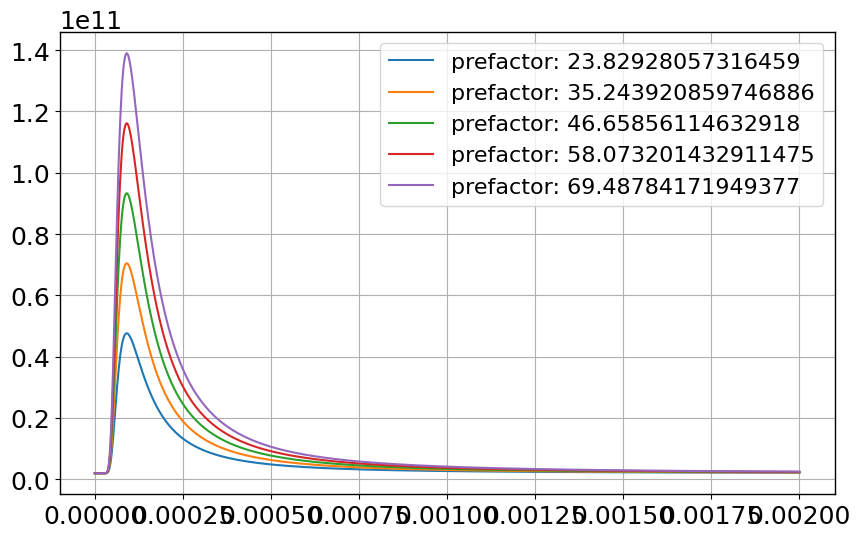

In [210]:
# tau_rise = 125e-6
# t = np.linspace(0, 2e-3, 1000)
# t = np.maximum(t - t[0], 1e-9)
# t = rise['t'].values[: 25]
t = np.linspace(0, 2e-3, 1000)
t = np.maximum(t - t[0], 1e-9)
qelm = elm_shape(t, tau_rise)

epsilon_peak_ELM = 15.502379e6 * 0.25  # replace with actual value for epsilon_peak_ELM

fig,ax = plt.subplots(1,1 , figsize=(10, 6))

tau_rise = 144e-6
for epsilon in [15.502379e6 * 1, 15.502379e6 * 1.5, 15.502379e6 * 2, 15.502379e6 * 2.5, 15.502379e6 * 3]:
    print(f'eplison: {epsilon * 1e-6}  MW/m^2 :  {(epsilon / 15.502379e6)*100}% ')
    print(f'rise time: {tau_rise * 1e6} us')

    ELM_power, prefactor = elm_power(t, tau_rise, epsilon, base_power= 2e9)
    ax.plot(t, ELM_power, label=f'prefactor: {np.max(prefactor)}')
    print('\n')
    
    # _, threshold_index = ELM_duration_finder(t, ELM_power)
    # print(f'threshold_index: {threshold_index}')
    # plt.axvline(t[threshold_index], linestyle='--', color='black')

ax.legend()
# # plt.plot(t, ELM_power)

### rise time for attached cases

eplison: 7.7511895  MW/m^2 :  50.0% 
rise time: 100.0 us
threshold_time: 0.0008748738748748748 s
q_0: 78.26959018454836 GW/m^2
Max ELM power: 34.05549852794648 GW/m^2
Max prefactor: 28.379582106622067


eplison: 15.502379  MW/m^2 :  100.0% 
rise time: 100.0 us
threshold_time: 0.0008748738748748748 s
q_0: 156.53918036909673 GW/m^2
Max ELM power: 66.91099705589296 GW/m^2
Max prefactor: 55.759164213244134


eplison: 23.2535685  MW/m^2 :  150.0% 
rise time: 100.0 us
threshold_time: 0.0008748738748748748 s
q_0: 234.8087705536451 GW/m^2
Max ELM power: 99.76649558383946 GW/m^2
Max prefactor: 83.1387463198662


eplison: 31.004758  MW/m^2 :  200.0% 
rise time: 100.0 us
threshold_time: 0.0008748738748748748 s
q_0: 313.07836073819345 GW/m^2
Max ELM power: 132.62199411178594 GW/m^2
Max prefactor: 110.51832842648827


eplison: 38.7559475  MW/m^2 :  250.0% 
rise time: 100.0 us
threshold_time: 0.0008748738748748748 s
q_0: 391.3479509227418 GW/m^2
Max ELM power: 165.4774926397324 GW/m^2
Max prefactor:

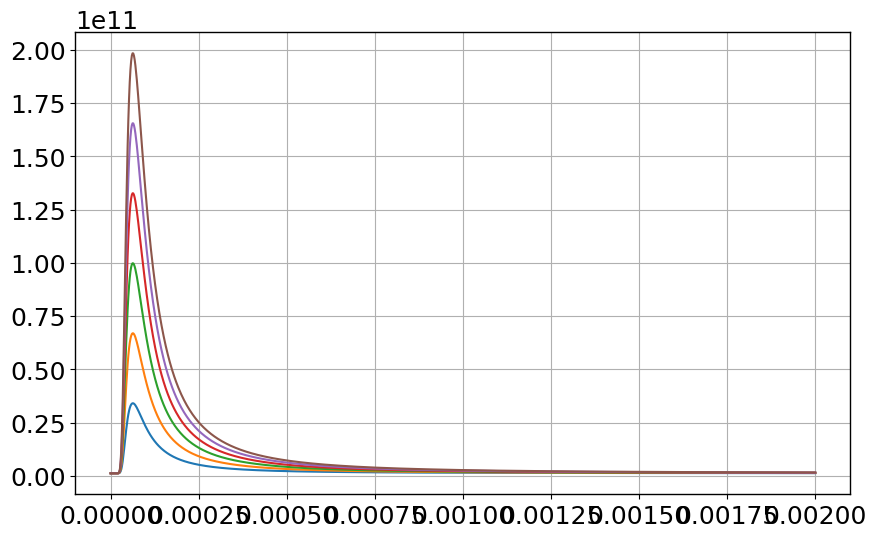

In [318]:
# tau_rise = 125e-6
# t = np.linspace(0, 2e-3, 1000)
# t = np.maximum(t - t[0], 1e-9)
# t = rise['t'].values[: 25]
t = np.linspace(0, 2e-3, 1000)
t = np.maximum(t - t[0], 1e-9)
qelm = elm_shape(t, tau_rise)

epsilon_peak_ELM = 15.502379e6 * 0.25  # replace with actual value for epsilon_peak_ELM

fig,ax = plt.subplots(1,1 , figsize=(10, 6))

tau_rise = 100e-6
for epsilon in [15.502379e6 * 0.5,15.502379e6 * 1, 15.502379e6 * 1.5, 15.502379e6 * 2, 15.502379e6 * 2.5, 15.502379e6 * 3]:
    print(f'eplison: {epsilon * 1e-6}  MW/m^2 :  {(epsilon / 15.502379e6)*100}% ')
    print(f'rise time: {tau_rise * 1e6} us')

    ELM_power, prefactor = elm_power(t, tau_rise, epsilon, base_power= 1.2e9)
    ax.plot(t, ELM_power, label=f'prefactor: {np.max(prefactor)}')
    print('\n')
    
    # _, threshold_index = ELM_duration_finder(t, ELM_power)
    # print(f'threshold_index: {threshold_index}')
    # plt.axvline(t[threshold_index], linestyle='--', color='black')

# ax.legend()
# # plt.plot(t, ELM_power)

# Rise time

In [300]:
rise_80 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_05_rise_time_125_more_data_points')

In [358]:
def q_electron(ds):
    y = ds['y'].values
    t = ds['t'].values # Convert time to milliseconds
    kappa_e = ds['kappa_par_e'].values.reshape(len(t), len(y))
    Te = ds['Te'].values.reshape(len(t), len(y))

    # Apply replace_guards to each time slice
    kappa_e = np.apply_along_axis(replace_guards, axis=1, arr=kappa_e)
    Te = np.apply_along_axis(replace_guards, axis=1, arr=Te)

    # Calculate the gradient of Te along the y-axis
    grad_T = np.gradient(Te, axis=1)
    q = -kappa_e * grad_T

    return q

def heatflux_t_profile(ds, location='target', normalise=False):
    """
    Calculate the heat flux profile at the specified location over time.

    Parameters:
        ds (xarray.Dataset): Dataset containing the relevant data arrays.
        location (str): Location to compute the heat flux ('target', 'xpoint', or 'upstream').
        normalise (bool): If True, normalise the results by the minimum value of the flux.

    Returns:
        list or np.ndarray: Heat flux profile at the specified location.
    """
    t = ds['t'].values * 1e3  # Convert time to milliseconds
    xpoint_location = ds.options['mesh']['length_xpt']
    y = ds['y'].values

    target_flux = []
    xpoint_flux = []

    # Find x-point index based on location
    x_point_index = np.argmin(np.abs(y - xpoint_location))

    # Ensure that kappa_e and Te are reshaped to 2D [time, y]
    kappa_e = ds['kappa_par_e'].values.reshape(len(t), len(y))
    Te = ds['Te'].values.reshape(len(t), len(y))

    # Apply replace_guards to each time slice
    kappa_e = np.apply_along_axis(replace_guards, axis=1, arr=kappa_e)
    Te = np.apply_along_axis(replace_guards, axis=1, arr=Te)

    # Calculate the gradient of Te along the y-axis
    grad_T = np.gradient(Te, axis=1)
    q = -kappa_e * grad_T

    if location == 'target':
        # Collect heat flux at the target (last index along y-axis)
        for indx in range(len(t)):
            target_flux.append(np.sum(q[indx, -20]))

        result = np.array(target_flux)

    elif location == 'xpoint':
        # Collect heat flux at the x-point location
        for indx in range(len(t)):
            xpoint_flux.append(np.sum(q[indx, x_point_index]))

        result = np.array(xpoint_flux)

    elif location == 'upstream':
        # Collect upstream source flux directly without modification
        src = ds['SPe'].values.reshape(len(t), len(y))
        result = src[:, 0]

    else:
        raise ValueError("Invalid location specified. Choose 'target', 'xpoint', or 'upstream'.")

    # Normalise the result if the normalise argument is True
    if normalise:
        result = result / np.min(result)

    return result



    

In [359]:
# rise = top_hat_2x_4x
from scipy.integrate import simps, trapz

def f(t, tau_rise,decay = 1):
    tau = tau_rise * 0.8
    epsilon_min             = 1e-9          # Small number to avoid divide by zero in t_current
    sim_start_timestep      = 62.6381085270527e-3          # Un-normalized time of the last time step
    rise_start              = 0.5e-3          # Offset from the sim start time step
    
    t_rise                  = t[0] + rise_start  # Time of the rise midpoint
    # Calculate t_current using BOUT++'s max function
    t_current               = np.maximum(t - t_rise, epsilon_min)  # Time since ELM pulse started

    return (1 + (tau / t_current)**2) * (tau / t_current)**2 * np.exp(-decay*(tau / t_current)**2)

def elm_shape(t, tau_rise,decay = 1):
    """
    Shape of the ELM power profile.

    """
    # epsilon_min             = 1e-9
    # t               = np.maximum(t - t[0], epsilon_min)

    tau = tau_rise * 0.8
    return (1 + (tau / t)**2) * (tau / t)**2 * np.exp(-decay*(tau / t)**2)

def ELM_duration_finder(t, y, threshold_factor=0.01):
    # Ensure inputs are numpy arrays
    t = np.asarray(t)
    y = np.asarray(y)

    # Find the peak value and its index
    peak_index = np.argmax(y)
    peak_value = y[peak_index]

    # Calculate the threshold (e.g., 1% of the peak value)
    threshold = threshold_factor * peak_value

    # Search for the first index below the threshold AFTER the peak
    indices_below_threshold = np.where(y[peak_index:] <= threshold)[0]

    if len(indices_below_threshold) > 0:
        # Add peak_index to adjust for slicing
        threshold_index = peak_index + indices_below_threshold[0]
        threshold_time = t[threshold_index]
        print(f'threshold_time: {threshold_time} s')
        return threshold_time, threshold_index



def elm_power(t, tau_rise, epsilon_peak_ELM, base_power= 1e9, decay = 1):
    # Define parameters
    epsilon_min             = 1e-9
    t = np.maximum(t - t[0], epsilon_min)
    ELM_shape = elm_shape(t, tau_rise, decay)
    ELM_time, ELM_index = ELM_duration_finder(t, ELM_shape, threshold_factor=0.01)

    # Calculate the integral I over the ELM duration
    I, _ = quad(elm_shape, 1e-9, ELM_time, args=(tau_rise))

    # Calculate q_div,ELM^max
    q_0 = epsilon_peak_ELM / I
    print(f'q_0: {q_0*1e-9} GW/m^2')
    shape = elm_shape(t, tau_rise, decay)

    ELM_power = base_power + ((q_0 * shape)/2)

    prefactor = base_power/base_power * (1 + q_0 * shape/(2*base_power))
    print(f'Max ELM power: {np.max(ELM_power)*1e-9} GW/m^2')
    print(f'Max prefactor: {np.max(prefactor)}')
    return ELM_power, prefactor


# tau_rise = 125e-6
# t = rise['t'].values
# t = np.maximum(t - t[0], 1e-9)
# qelm = elm_shape(t, tau_rise)

# epsilon_peak_ELM = 15.502379e6 * 0.25  # replace with actual value for epsilon_peak_ELM

# for tau_rise in [80e-6 ,125e-6, 250e-6, 500e-6]:
#     print(f'tau_rise = {tau_rise}')
#     ELM_power, prefactor = elm_power(t, tau_rise, epsilon_peak_ELM, base_power= 0.4e9)
#     plt.plot(t, ELM_power, label=f'tau_rise = {tau_rise*1e6} us')
#     print('\n')
    
#     # _, threshold_index = ELM_duration_finder(t, ELM_power)
#     # print(f'threshold_index: {threshold_index}')
#     # plt.axvline(t[threshold_index], linestyle='--', color='black')

# plt.legend()
# # # plt.plot(t, ELM_power)




In [360]:
def elm_scaled(t, q0, tau_rise):
    """
    Shape of the ELM power profile.

    """
    # epsilon_min             = 1e-9
    # t               = np.maximum(t - t[0], epsilon_min)

    tau = tau_rise * 0.8

    return q0 * (1 + (tau / t)**2) * (tau / t)**2 * np.exp(-(tau / t)**2)

In [361]:
def find_fall_time_and_index(x, y, threshold_factor=0.01):

    # Find the peak index and value
    peak_index = np.argmax(y)
    peak_value = y[peak_index]

    # Calculate the threshold
    threshold = threshold_factor * peak_value

    # Find the first index after the peak where y falls below the threshold
    indices_below_threshold = np.where(y[peak_index:] <= threshold)[0]
    if len(indices_below_threshold) > 0:
        fall_index = peak_index + indices_below_threshold[0]
        fall_time = x[fall_index]
        return fall_time, fall_index
    else:
        # If no values are below the threshold, return None
        return None, None


[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

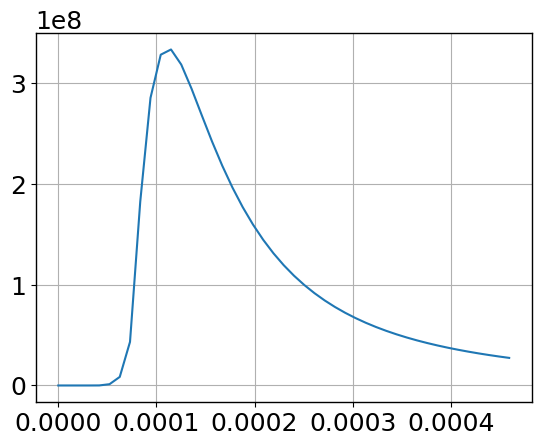

In [362]:
heatflux_80 = heatflux_t_profile(rise_80, location='target', normalise=False)
upstream_80 = heatflux_t_profile(rise_80, location='xpoint', normalise=False)
source_80 = heatflux_t_profile(rise_80, location='upstream', normalise=False)
t = rise_80['t'].values
t = np.maximum(t - t[0], 1e-9)


# Truncate the time array and corresponding data
pulse_start = 0.5e-3
truncated_indices = t >= pulse_start
print(truncated_indices)
t = t[truncated_indices]
t = np.maximum(t - t[0], 1e-9)
heatflux_80 = heatflux_80[truncated_indices]  # Replace 'y' with your data array
heatflux_80 = heatflux_80 - np.min(heatflux_80)
upstream_80 = upstream_80[truncated_indices]
upstream_80 = upstream_80 - np.min(upstream_80)
source_80 = source_80[truncated_indices]
source_80 = source_80 - np.min(source_80)

time, index = find_fall_time_and_index(t, heatflux_80, threshold_factor=0.08)

t = t[:index]
heatflux_80 = heatflux_80[:index]
upstream_80 = upstream_80[:index]
source_80 = source_80[:index]



# t = t[np.argmax(np.abs(t-1e-3)):]

plt.plot(t, heatflux_80, label='80 us')

In [363]:
def e_fall_time(t, y):
    """
    Finds the time and index where y falls to 1/e of its peak value after the peak.
    
    Parameters:
    - t: numpy array of time values
    - y: numpy array of corresponding y values
    
    Returns:
    - fall_time: The time where y falls to 1/e of its peak value
    - fall_index: The index where y falls to 1/e of its peak value
    """
    # Ensure inputs are numpy arrays
    t = np.asarray(t)
    y = np.asarray(y)

    # Find the peak value and its index
    peak_index = np.argmax(y)
    peak_value = y[peak_index]
    threshold = peak_value / np.e  # 1/e of the peak value

    # Search for the first index below the threshold AFTER the peak
    indices_below_threshold = np.where(y[peak_index:] <= threshold)[0]

    if len(indices_below_threshold) > 0:
        # Add peak_index to adjust for slicing
        fall_index = peak_index + indices_below_threshold[0]
        fall_time = t[fall_index]
        return fall_time, fall_index
    else:
        # If no values below the threshold are found
        return None, None


Fitted Parameters:
q0: 3.49e+08
tau_rise: 184.27 µs


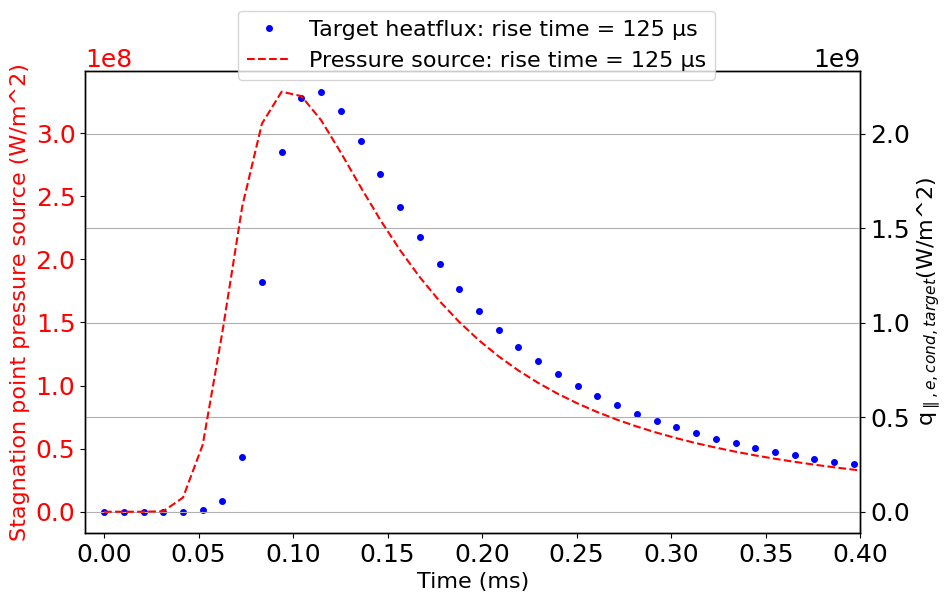

In [364]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the fitting function
def elm_scaled(t, q0, tau_rise):
    """
    Shape of the ELM power profile.
    """
    tau = tau_rise * 0.8
    return q0 * (1 + (tau / t) ** 2) * (tau / t) ** 2 * np.exp(-(tau / t) ** 2)

# Perform curve fitting
popt, pcov = curve_fit(elm_scaled, t, heatflux_80, p0=(1e8, 80e-6), maxfev=5000)

# Extract fitted parameters
q0_fit, tau_rise_fit = popt

# Generate the fitted curve
fitted_curve = elm_scaled(t, q0_fit, tau_rise_fit)

# Plot the original data and fitted curve

fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax2 = ax.twinx()

t_mil = t * 1e3

# ax.plot(t_mil, fitted_curve, label=f"Fitted Curve: rise time = {tau_rise_fit*1e6:.2f} µs", color = 'black', linestyle = ':')
ax.plot(t_mil, heatflux_80, label="Target heatflux: rise time = 125 µs", marker='o', linestyle='', markersize=4, color = 'blue')


ax2.plot(t_mil, upstream_80, label="Pressure source: rise time = 125 µs", markersize=4, color = 'red', linestyle = '--')

ax2.set_xlabel("Time (s)")
ax2.set_ylabel(r"q$_{\parallel,e,cond, target}$(W/m^2)")
ax.set_ylabel(r"Stagnation point pressure source (W/m^2)", color = 'red')
ax.set_xlabel("Time (ms)")
ax.tick_params(axis='y', labelcolor='red')
fig.legend(loc = 'upper center')
ax.set_xbound(-0.01, 0.4)
ax.grid()
# Print the fitted parameters
print(f"Fitted Parameters:")
print(f"q0: {q0_fit:.2e}")
print(f"tau_rise: {tau_rise_fit*1e6:.2f} µs")



Fitted Parameters:
q0: 3.49e+08
tau_rise: 184.27 µs


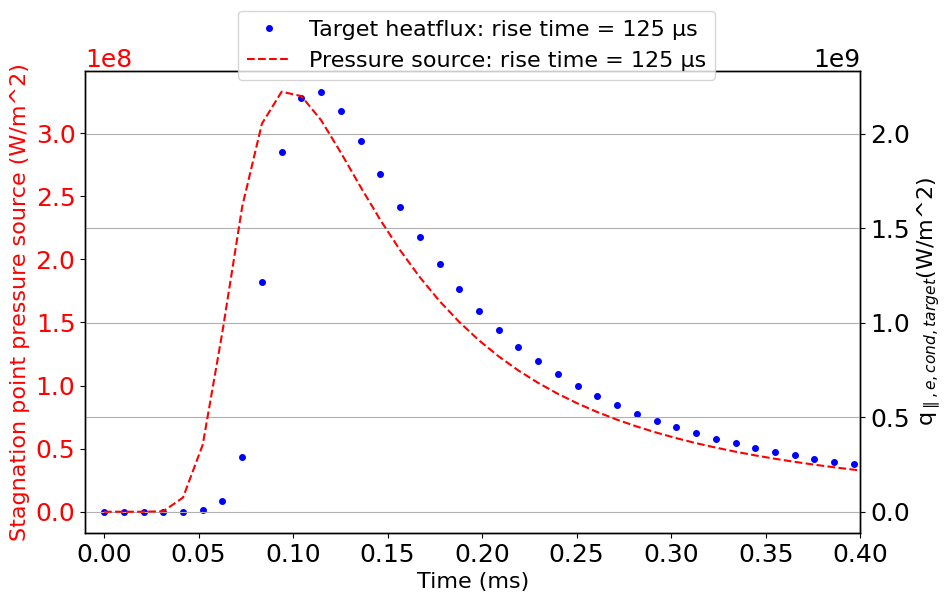

In [365]:
fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax2 = ax.twinx()

t_mil = t * 1e3

# ax.plot(t_mil, fitted_curve, label=f"Fitted Curve: rise time = {tau_rise_fit*1e6:.2f} µs", color = 'black', linestyle = ':')
ax.plot(t_mil, heatflux_80, label="Target heatflux: rise time = 125 µs", marker='o', linestyle='', markersize=4, color = 'blue')


ax2.plot(t_mil, upstream_80, label="Pressure source: rise time = 125 µs", markersize=4, color = 'red', linestyle = '--')

ax2.set_xlabel("Time (s)")
ax2.set_ylabel(r"q$_{\parallel,e,cond, target}$(W/m^2)")
ax.set_ylabel(r"Stagnation point pressure source (W/m^2)", color = 'red')
ax.set_xlabel("Time (ms)")
ax.tick_params(axis='y', labelcolor='red')
fig.legend(loc = 'upper center')
ax.set_xbound(-0.01, 0.4)
ax.grid()
# Print the fitted parameters
print(f"Fitted Parameters:")
print(f"q0: {q0_fit:.2e}")
print(f"tau_rise: {tau_rise_fit*1e6:.2f} µs")

Fitted Parameters:
q0: 3.61e+08
tau_rise: 189.00 µs


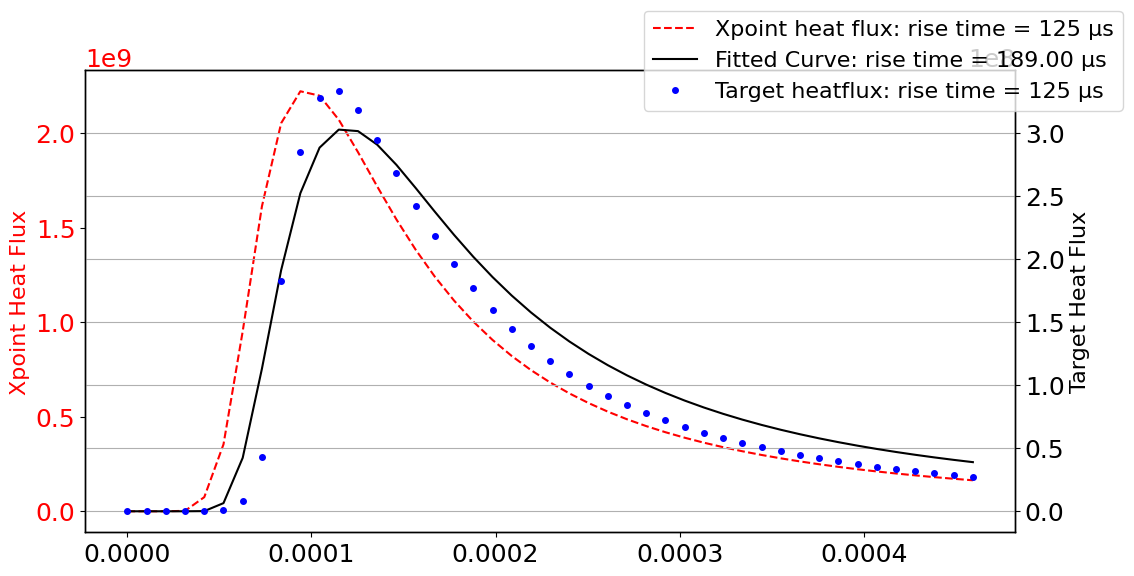

In [309]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Define the fitting function
def elm_scaled(t, q0, tau_rise):
    """
    Shape of the ELM power profile.
    """
    tau = tau_rise * 0.8
    return q0 * (1 + (tau / t) ** 2) * (tau / t) ** 2 * np.exp(-(tau / t) ** 2)

# Calculate weights to prioritise fitting near the peak
peak_index = np.argmax(heatflux_80)
weights = np.exp(-((t - t[peak_index]) / (0.1e-3)) ** 8)  # Gaussian weights centred at the peak
sigma = 1 / weights  # Use reciprocal of weights as sigma

# Perform weighted curve fitting
popt, pcov = curve_fit(elm_scaled, t, heatflux_80, p0=(1e8, 80e-6), sigma=sigma, maxfev=5000)

# Extract fitted parameters
q0_fit, tau_rise_fit = popt

# Generate the fitted curve
fitted_curve = elm_scaled(t, q0_fit, tau_rise_fit)

# Plot the original data and fitted curve
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
ax2 = ax.twinx()

ax2.plot(t, fitted_curve, label=f"Fitted Curve: rise time = {tau_rise_fit*1e6:.2f} µs", color='black')
ax2.plot(t, heatflux_80, label="Target heatflux: rise time = 125 µs", marker='o', linestyle='', markersize=4, color='blue')

ax.plot(t, upstream_80, label="Xpoint heat flux: rise time = 125 µs", markersize=4, color='red', linestyle='--')

ax2.set_xlabel("Time (s)")
ax2.set_ylabel("Target Heat Flux")
ax.set_ylabel("Xpoint Heat Flux", color='red')
ax.tick_params(axis='y', labelcolor='red')
fig.legend()
ax.grid()

# Print the fitted parameters
print(f"Fitted Parameters:")
print(f"q0: {q0_fit:.2e}")
print(f"tau_rise: {tau_rise_fit*1e6:.2f} µs")


### SNB rise time

In [246]:
snb = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_05_rise_time_125_SNB')

In [349]:
from scipy.integrate import cumtrapz
import numpy as np

def divq_integrate(slice_data, snb_int=False):
    """
    Calculate the total heat flux from the divergence of the Spitzer-Harm fluxes.
    If snb_int == True, outputs the integral of divq_snb, otherwise outputs the integral of divq_sh.
    """
    x = np.ravel(slice_data['y'])[1:-1]  # Extract 'y' array directly
    div_q_snb = replace_guards(np.ravel(slice_data['Div_Q_SNB']))  # Extract 'Div_Q_SNB' array directly
    div_q_sh = replace_guards(np.ravel(slice_data['Div_Q_SH']))  # Extract 'Div_Q_SH' array directly

    q_snb = cumtrapz(div_q_snb, x, initial=0)  # Integrate using cumulative trapezoidal rule
    q_sh = cumtrapz(div_q_sh, x, initial=0)

    return q_snb if snb_int else q_sh



def heatflux_t_profile(ds, location='target', normalise=False, use_divq=False, snb_int=False):
    """
    Calculate the heat flux profile at the specified location over time.
    """
    t = ds['t'].values * 1e3  # Convert time to milliseconds
    xpoint_location = ds.options['mesh']['length_xpt']
    y = ds['y'].values

    target_flux = []
    xpoint_flux = []

    # Find x-point index based on location
    x_point_index = np.argmin(np.abs(y - xpoint_location))

    for indx in range(len(t)):
        if use_divq:
            # Create slice data for divq_integrate
            slice_data = {
                'y': y,
                'Div_Q_SNB': ds['Div_Q_SNB'].isel(t=indx).values,
                'Div_Q_SH': ds['Div_Q_SH'].isel(t=indx).values
            }
            q = divq_integrate(slice_data, snb_int=snb_int)

            if location == 'target':
                target_flux.append(q[-1])  # Target flux at the end of the domain
            elif location == 'xpoint':
                xpoint_flux.append(q[x_point_index])  # Flux at the x-point location
        elif location != 'upstream':
            # Use Spitzer-Harm flux calculations
            kappa_e = ds['kappa_par_e'].isel(t=indx).values
            Te = ds['Te'].isel(t=indx).values
            kappa_e = replace_guards(np.squeeze(kappa_e))
            Te = replace_guards(np.squeeze(Te))

            grad_T = np.gradient(Te, y)
            q = -kappa_e * grad_T

            if location == 'target':
                target_flux.append(np.sum(q[-20]))
            elif location == 'xpoint':
                xpoint_flux.append(np.sum(q[x_point_index]))
        else:
            # Use upstream source flux directly
            src = ds['Pe_src'].isel(t=indx).values
            result = src[0]

    result = None
    if location == 'target':
        result = np.array(target_flux)
    elif location == 'xpoint':
        result = np.array(xpoint_flux)
    elif location == 'upstream':
        src = ds['Pe_src'].values.reshape(len(t), len(y))
        result = src[:, 0]
    else:
        raise ValueError("Invalid location specified. Choose 'target', 'xpoint', or 'upstream'.")

    if normalise:
        result = result / np.min(result)

    return result



In [248]:
# heatflux_snb = heatflux_t_profile(snb, location='target', normalise=False, use_divq=True, snb_int=True)
# upstream_snb = heatflux_t_profile(snb, location='xpoint', normalise=False, use_divq=True, snb_int=True)
# source_snb = heatflux_t_profile(snb, location='upstream', normalise=False, use_divq=True, snb_int=True)


In [348]:
snb = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_06_rise_time_150_SNB_more_data_points')


In [350]:
heatflux_snb = heatflux_t_profile(snb, location='target', normalise=False, use_divq=True, snb_int=True)
upstream_snb = heatflux_t_profile(snb, location='xpoint', normalise=False, use_divq=True, snb_int=True)
source_snb = heatflux_t_profile(snb, location='upstream', normalise=False, use_divq=False, snb_int=False)

t = snb['t'].values
t = np.maximum(t - t[0], 1e-9)


# Truncate the time array and corresponding data
pulse_start = 0.5e-3
truncated_indices = t >= pulse_start
t = t[truncated_indices]
t = np.maximum(t - t[0], 1e-9)

heatflux_snb = heatflux_snb[truncated_indices]  # Replace 'y' with your data array
heatflux_snb = heatflux_snb - np.min(heatflux_snb)
upstream_snb = upstream_snb[truncated_indices]
upstream_snb = upstream_snb - np.min(upstream_snb)
source_snb = source_snb[truncated_indices]
source_snb = source_snb - np.min(source_snb)

time, index = find_fall_time_and_index(t, heatflux_snb, threshold_factor=0.01)

t = t[:index]

heatflux_snb = heatflux_snb[:index]
upstream_snb = upstream_snb[:index]
source_snb = source_snb[:index]


# t = t[np.argmax(np.abs(t-1e-3):]


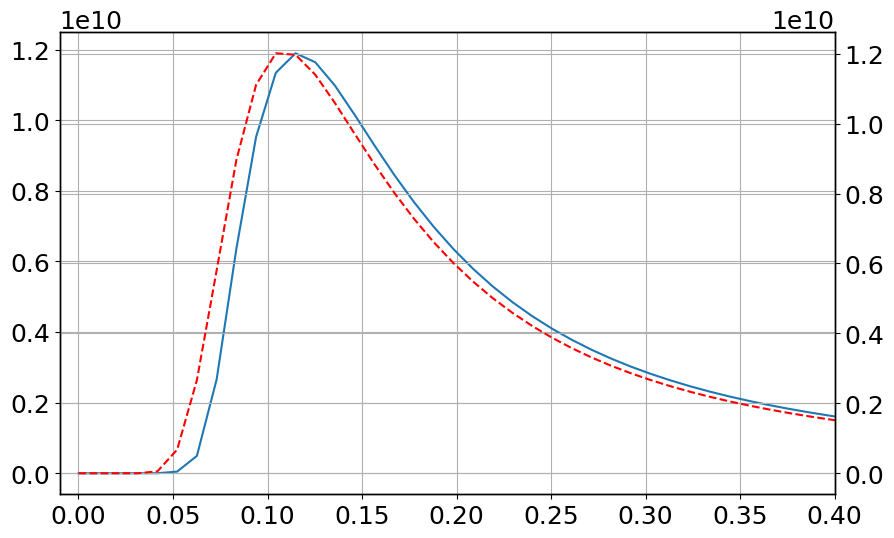

In [353]:
t_plot = t * 1e3
fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax2 = ax.twinx()
ax.plot(t_plot, heatflux_snb, label='144 us')
ax2.plot(t_plot, upstream_snb, label='Pressure source: 144 us', color = 'red', linestyle = '--')

ax.set_xbound(-0.01, 0.4)

q0: 1.30e+10
tau_rise: 187.93 µs


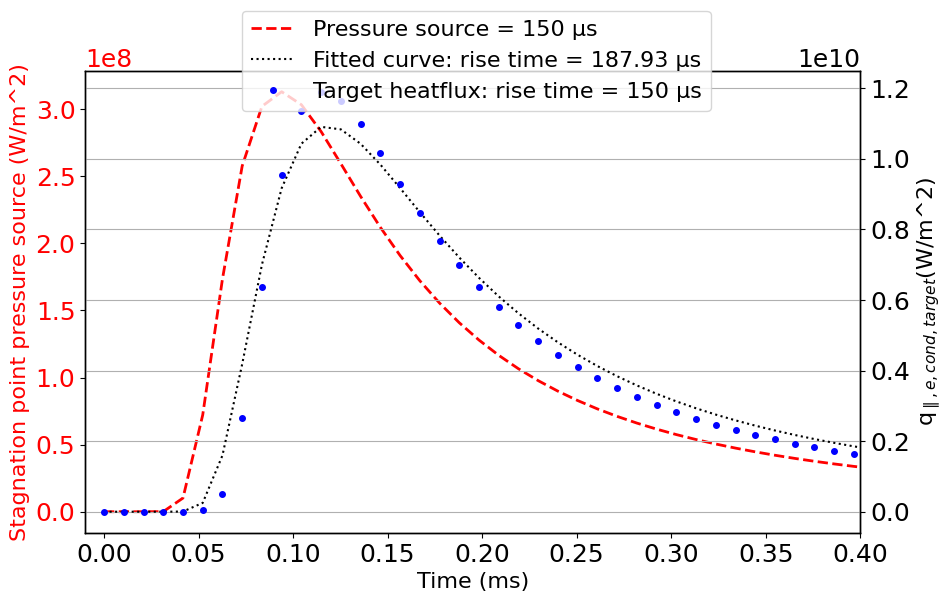

In [299]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def elm_scaled(t, q0, tau_rise):
    """
    Shape of the ELM power profile.
    """
    tau = tau_rise * 0.8
    return q0 * (1 + (tau / t) ** 2) * (tau / t) ** 2 * np.exp(-(tau / t) ** 2)

popt, pcov = curve_fit(elm_scaled, t, heatflux_snb, p0=(1e8, 144e-6), maxfev=5000)

q0_fit, tau_rise_fit = popt

# Generate the fitted curve
fitted_curve = elm_scaled(t, q0_fit, tau_rise_fit)

fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax2 = ax.twinx()


# time_ms = np.linspace(0, 0.6, len(t))
# time_ms = t * 1e3




ax2.plot(t_plot, fitted_curve, label=f"Fitted curve: rise time = {tau_rise_fit*1e6:.2f} µs", color = 'black', linestyle = ':')
ax2.plot(t_plot, heatflux_snb, label="Target heatflux: rise time = 150 µs", marker='o', linestyle='', markersize=4, color = 'blue')


ax.plot(t_plot, source_snb, label="Pressure source = 150 µs", markersize=4, color = 'red', linestyle = '--', linewidth = 2)

ax.set_xlabel("Time (ms)")
ax2.set_ylabel(r"q$_{\parallel,e,cond, target}$(W/m^2)")

ax.set_ylabel(r"Stagnation point pressure source (W/m^2)", color = 'red')
ax.tick_params(axis='y', labelcolor='red')
fig.legend(loc = 'upper center')
ax.set_xbound(-0.01, 0.4)
ax.grid()
# ax.set_xbound(0.052, 0.054)
print(f"q0: {q0_fit:.2e}")
print(f"tau_rise: {tau_rise_fit*1e6:.2f} µs")

q0: 3.49e+08
tau_rise: 184.27 µs


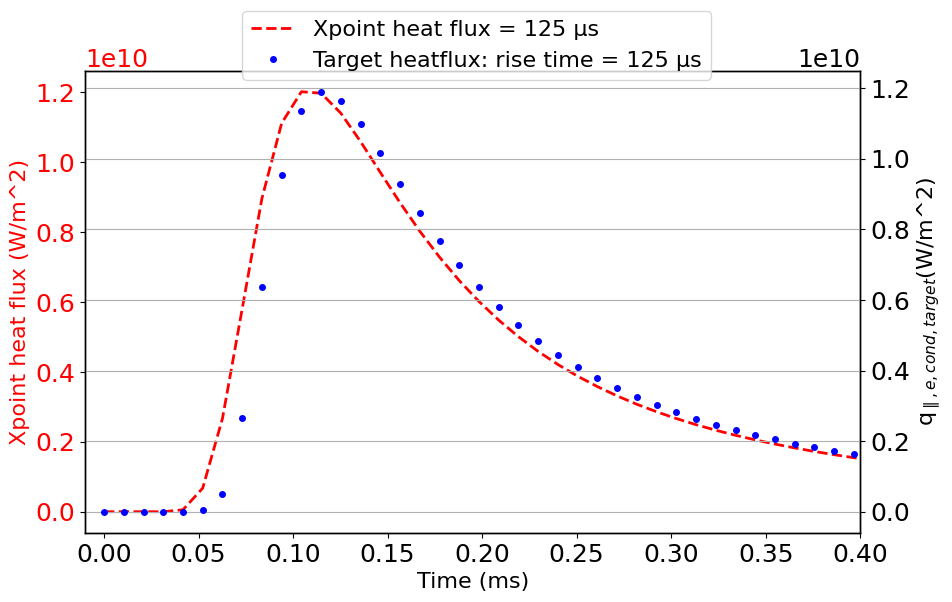

In [356]:
fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax2 = ax.twinx()


# time_ms = np.linspace(0, 0.6, len(t))
# time_ms = t * 1e3




# ax2.plot(t_plot, fitted_curve, label=f"Fitted curve: rise time = {tau_rise_fit*1e6:.2f} µs", color = 'black', linestyle = ':')
ax2.plot(t_plot, heatflux_snb, label="Target heatflux: rise time = 125 µs", marker='o', linestyle='', markersize=4, color = 'blue')


ax.plot(t_plot, upstream_snb, label="Xpoint heat flux = 125 µs", markersize=4, color = 'red', linestyle = '--', linewidth = 2)

ax.set_xlabel("Time (ms)")
ax2.set_ylabel(r"q$_{\parallel,e,cond, target}$(W/m^2)")

ax.set_ylabel(r"Xpoint heat flux (W/m^2)", color = 'red')
ax.tick_params(axis='y', labelcolor='red')
fig.legend(loc = 'upper center')
ax.set_xbound(-0.01, 0.4)
ax.grid()
# ax.set_xbound(0.052, 0.054)
print(f"q0: {q0_fit:.2e}")
print(f"tau_rise: {tau_rise_fit*1e6:.2f} µs")

q0: 1.18e+10
tau_rise: 90894.06 µs


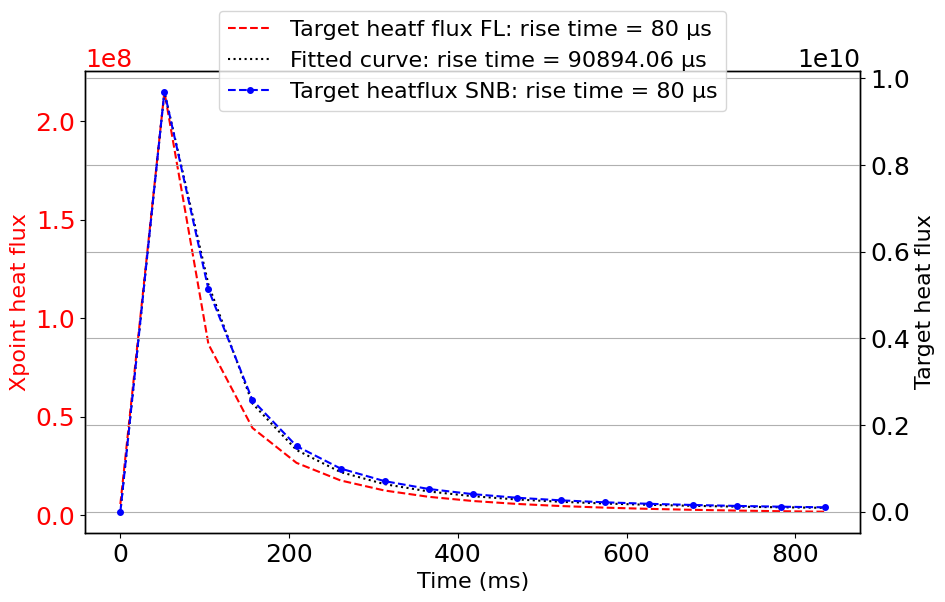

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def elm_scaled(t, q0, tau_rise):
    """
    Shape of the ELM power profile.
    """
    tau = tau_rise * 0.8
    return q0 * (1 + (tau / t) ** 2) * (tau / t) ** 2 * np.exp(-(tau / t) ** 2)

popt, pcov = curve_fit(elm_scaled, t, heatflux_snb, p0=(1e8, 80e-6), maxfev=5000)

q0_fit, tau_rise_fit = popt

# Generate the fitted curve
fitted_curve = elm_scaled(t, q0_fit, tau_rise_fit)

fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax2 = ax.twinx()

time_ms = t * 1e3
ax2.plot(time_ms, fitted_curve, label=f"Fitted curve: rise time = {tau_rise_fit*1e6:.2f} µs", color = 'black', linestyle = ':')
ax2.plot(time_ms, heatflux_snb, label="Target heatflux SNB: rise time = 80 µs", marker='o', linestyle='--', markersize=4, color = 'blue')
ax.plot(time_ms, source_snb, label="Target heatf flux FL: rise time = 80 µs", markersize=4, color = 'red', linestyle = '--')


# ax.plot(time_ms, source_snb, label="Xpoint heat flux: rise time = 80 µs", markersize=4, color = 'red', linestyle = '--', linewidth = 2)

ax.set_xlabel("Time (ms)")
ax2.set_ylabel("Target heat flux")

ax.set_ylabel("Xpoint heat flux", color = 'red')
ax.tick_params(axis='y', labelcolor='red')
fig.legend(loc = 'upper center')
ax.grid()
# ax.set_xbound(0.052, 0.054)
print(f"q0: {q0_fit:.2e}")
print(f"tau_rise: {tau_rise_fit*1e6:.2f} µs")

In [20]:
snb_144_rise = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_04_rise_time_144_SNB_ion_viscosity')

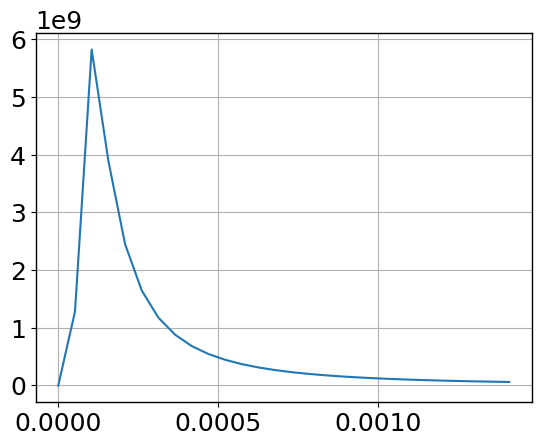

In [21]:

heatflux_snb = heatflux_t_profile(snb_144_rise, location='target', normalise=False, use_divq=True, snb_int=True)
upstream_snb = heatflux_t_profile(snb_144_rise, location='xpoint', normalise=False, use_divq=True, snb_int=True)
source_snb = heatflux_t_profile(snb_144_rise, location='upstream', normalise=False, use_divq=False, snb_int=False)

t = snb_144_rise['t'].values
t = np.maximum(t - t[0], 1e-9)


# Truncate the time array and corresponding data
pulse_start = 0.5e-3
truncated_indices = t >= pulse_start
t = t[truncated_indices]
t = np.maximum(t - t[0], 1e-9)

heatflux_snb = heatflux_snb[truncated_indices]  # Replace 'y' with your data array
heatflux_snb = heatflux_snb - np.min(heatflux_snb)
upstream_snb = upstream_snb[truncated_indices]
upstream_snb = upstream_snb - np.min(upstream_snb)
source_snb = source_snb[truncated_indices]
source_snb = source_snb - np.min(source_snb)

time, index = find_fall_time_and_index(t, heatflux_snb, threshold_factor=0.01)

t = t[:index]
heatflux_snb = heatflux_snb[:index]
upstream_snb = upstream_snb[:index]
source_snb = source_snb[:index]


# t = t[np.argmax(np.abs(t-1e-3):]

plt.plot(t, heatflux_snb, label='80 us')

q0: 7.29e+09
tau_rise: 151.68 µs


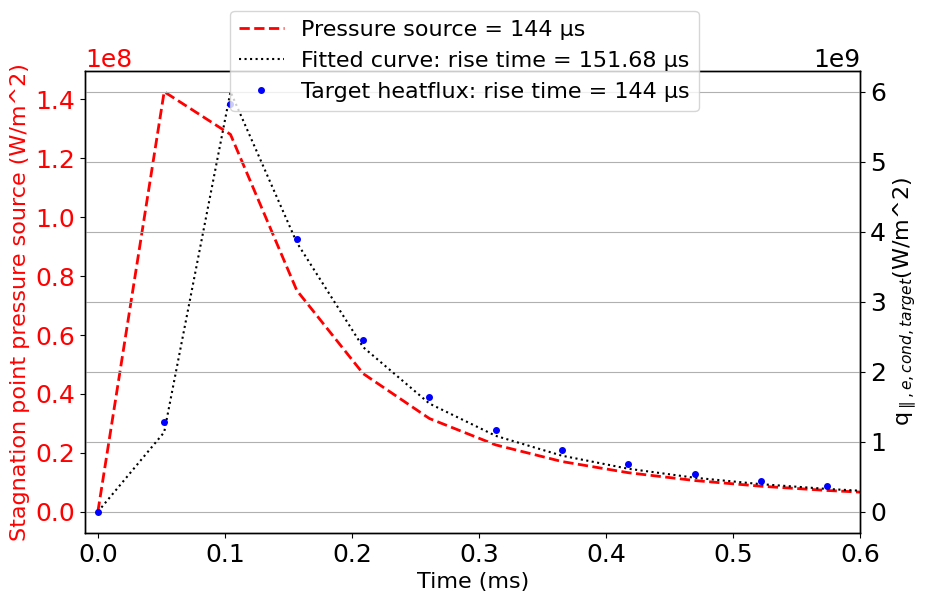

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def elm_scaled(t, q0, tau_rise):
    """
    Shape of the ELM power profile.
    """
    tau = tau_rise * 0.8
    return q0 * (1 + (tau / t) ** 2) * (tau / t) ** 2 * np.exp(-(tau / t) ** 2)

popt, pcov = curve_fit(elm_scaled, t, heatflux_snb, p0=(1e8, 144e-6), maxfev=5000)

q0_fit, tau_rise_fit = popt

# Generate the fitted curve
fitted_curve = elm_scaled(t, q0_fit, tau_rise_fit)

fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax2 = ax.twinx()


# time_ms = np.linspace(0, 0.6, len(t))
time_ms = t * 1e3




ax2.plot(time_ms, fitted_curve, label=f"Fitted curve: rise time = {tau_rise_fit*1e6:.2f} µs", color = 'black', linestyle = ':')
ax2.plot(time_ms, heatflux_snb, label="Target heatflux: rise time = 144 µs", marker='o', linestyle='', markersize=4, color = 'blue')


ax.plot(time_ms, source_snb, label="Pressure source = 144 µs", markersize=4, color = 'red', linestyle = '--', linewidth = 2)

ax.set_xlabel("Time (ms)")
ax2.set_ylabel(r"q$_{\parallel,e,cond, target}$(W/m^2)")

ax.set_ylabel(r"Stagnation point pressure source (W/m^2)", color = 'red')
ax.tick_params(axis='y', labelcolor='red')
fig.legend(loc = 'upper center')
ax.set_xbound(-0.01, 0.6)
ax.grid()
# ax.set_xbound(0.052, 0.054)
print(f"q0: {q0_fit:.2e}")
print(f"tau_rise: {tau_rise_fit*1e6:.2f} µs")

#### Caclulation of electron thermal speed

In [13]:
Te_max = np.max(snb['Te'].values)
print(Te_max)
vth = np.sqrt(Te_max * 1.60217662e-19 / 9.10938356e-31)

print(f'vth: {vth * 1e-3} km/s')
print(f'vth/c: {vth / 3e8}')
print(f'4*vth: {4*vth * 1e-3} km/s')
print(f'4*vth/c: {4*vth / 3e8}')

length = 51  

time_to_target = length / vth
print(f'time_to_target_vth: {time_to_target * 1e6} us')
print(f'time_to_target_4vth: {(time_to_target/4) *1e6} us')

562.2876333489661
vth: 9944.660617960784 km/s
vth/c: 0.03314886872653595
4*vth: 39778.64247184314 km/s
4*vth/c: 0.1325954749061438
time_to_target_vth: 5.128380138774196 us
time_to_target_4vth: 1.282095034693549 us


#### Comparison between FL and SNB

In [68]:
snb_80 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_03_rise_time_80_SNB_ion_viscosity')

FL_80 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_01_rise_time_80_ion_viscosity')

In [111]:
snb_144_rise = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_03_rise_time_125_SNB_ion_viscosity')

OSError: No datafiles found matching datapath=/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/rise_time/loarte_profile/q_0/case_03_rise_time_125_SNB_ion_viscosity/BOUT.dmp.*.nc

In [77]:
from scipy.integrate import cumtrapz
import numpy as np

def divq_integrate(slice_data, snb_int=False):
    """
    Calculate the total heat flux from the divergence of the Spitzer-Harm fluxes.
    If snb_int == True, outputs the integral of divq_snb, otherwise outputs the integral of divq_sh.
    """
    x = np.ravel(slice_data['y'])[1:-1]  # Extract 'y' array directly
    div_q_snb = replace_guards(np.ravel(slice_data['Div_Q_SNB']))  # Extract 'Div_Q_SNB' array directly
    div_q_sh = replace_guards(np.ravel(slice_data['Div_Q_SH']))  # Extract 'Div_Q_SH' array directly

    q_snb = cumtrapz(div_q_snb, x, initial=0)  # Integrate using cumulative trapezoidal rule
    q_sh = cumtrapz(div_q_sh, x, initial=0)

    return q_snb if snb_int else q_sh



def heatflux_t_profile(ds, location='target', normalise=False, use_divq=False, snb_int=False):
    """
    Calculate the heat flux profile at the specified location over time.
    """
    t = ds['t'].values * 1e3  # Convert time to milliseconds
    xpoint_location = ds.options['mesh']['length_xpt']
    y = ds['y'].values

    target_flux = []
    xpoint_flux = []

    # Find x-point index based on location
    x_point_index = np.argmin(np.abs(y - xpoint_location))

    for indx in range(len(t)):
        if use_divq:
            # Create slice data for divq_integrate
            slice_data = {
                'y': y,
                'Div_Q_SNB': ds['Div_Q_SNB'].isel(t=indx).values,
                'Div_Q_SH': ds['Div_Q_SH'].isel(t=indx).values
            }
            q = divq_integrate(slice_data, snb_int=snb_int)

            if location == 'target':
                target_flux.append(q[-1])  # Target flux at the end of the domain
            elif location == 'xpoint':
                xpoint_flux.append(q[x_point_index])  # Flux at the x-point location
        elif location != 'upstream':
            # Use Spitzer-Harm flux calculations
            y = ds['y'].values[1:-1]
            kappa_e = ds['kappa_par_e'].isel(t=indx).values
            Te = ds['Te'].isel(t=indx).values
            kappa_e = replace_guards(np.squeeze(kappa_e))
            Te = replace_guards(np.squeeze(Te))
            

            grad_T = np.gradient(Te, y)
            q = -kappa_e * grad_T

            if location == 'target':
                target_flux.append(np.sum(q[-20]))
            elif location == 'xpoint':
                xpoint_flux.append(np.sum(q[x_point_index]))
        else:
            # Use upstream source flux directly
            src = ds['Pe_src'].isel(t=indx).values
            result = src[0]

    result = None
    if location == 'target':
        result = np.array(target_flux)
    elif location == 'xpoint':
        result = np.array(xpoint_flux)
    elif location == 'upstream':
        src = ds['Pe_src'].values.reshape(len(t), len(y))
        result = src[:, 0]
    else:
        raise ValueError("Invalid location specified. Choose 'target', 'xpoint', or 'upstream'.")

    if normalise:
        result = result / np.min(result)

    return result



In [80]:
heatflux_FL = heatflux_t_profile(FL_80, location='target', normalise=False)
heatflux_snb_80 = heatflux_t_profile(snb_80, location='target', normalise=False, use_divq=True, snb_int=True)


# heatflux_snb = heatflux_t_profile(snb_144_rise, location='target', normalise=False, use_divq=True, snb_int=True)
# upstream_snb = heatflux_t_profile(snb_144_rise, location='xpoint', normalise=False, use_divq=True, snb_int=True)
# source_snb = heatflux_t_profile(snb_144_rise, location='upstream', normalise=False, use_divq=False, snb_int=False)

# dataset = {'FL_80': FL_80, 'SNB_80': snb_80}

# for key, value in dataset.items():

#     heatflux = heatflux_t_profile(value, location='target', normalise=False)

#     t = value['t'].values
#     t = np.maximum(t - t[0], 1e-9)


#     # Truncate the time array and corresponding data
#     pulse_start = 0.5e-3
#     truncated_indices = t >= pulse_start
#     t = t[truncated_indices]
#     t = np.maximum(t - t[0], 1e-9)

#     heatflux = value[truncated_indices]  # Replace 'y' with your data array
#     heatflux = value - np.min(heatflux)


#     time, index = find_fall_time_and_index(t, heatflux, threshold_factor=0.01)

#     t = t[:index]
#     heatflux = heatflux[:index]


#     # t = t[np.argmax(np.abs(t-1e-3):]

#     plt.plot(t, heatflux, label='80 us')

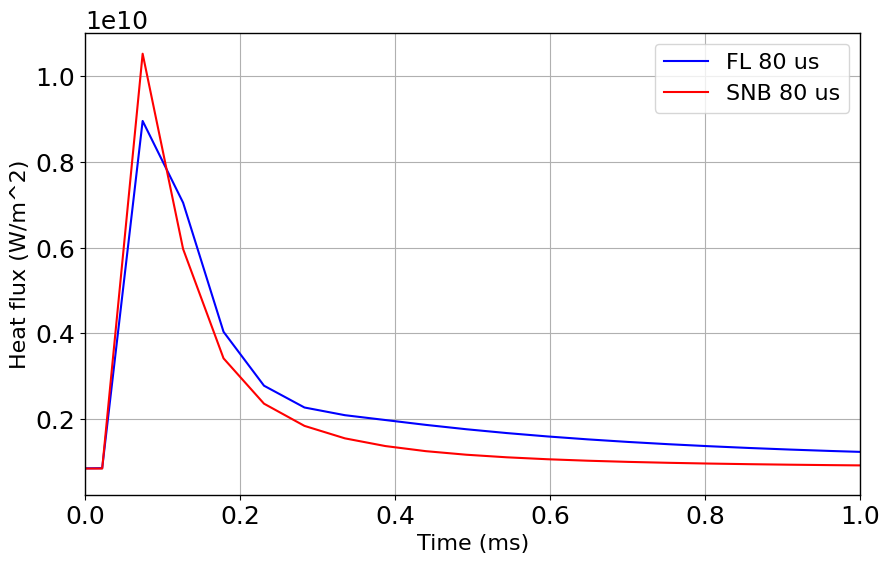

In [113]:
t_FL = FL_80['t'].values
t_FL = np.maximum(t_FL - t_FL[0], 1e-9)

t_snb = snb_80['t'].values
t_snb = np.maximum(t_snb - t_snb[0], 1e-9)

t_FL = t_FL -0.5e-3

t_FL *= 1e3

fig,ax = plt.subplots(1,1 , figsize=(10, 6))

ax.plot(t_FL, heatflux_FL, label='FL 80 us', color = 'blue')
ax.plot(t_FL, heatflux_snb, label='SNB 80 us', color = 'red')
ax.set_xlabel('Time (ms)')
ax.set_ylabel('Heat flux (W/m^2)')
# ax.set_yscale('log')
ax.legend()
ax.set_xbound(0, 1)

In [11]:
# Example data
t = np.linspace(0, 1e-3, 100)
y = np.exp(-t / 1e-4) * np.max(np.exp(-t / 1e-4))  # Exponential decay profile

# Find the fall time
fall_time, fall_index = find_fall_time(t, y)

# Print results
if fall_time is not None:
    print(f"Fall Time: {fall_time:.3e} s, Index: {fall_index}")
else:
    print("The 1/e fall time could not be found.")

# Plot results
plt.plot(t, y, label="Data")
if fall_time is not None:
    plt.axvline(t[fall_index], color="red", linestyle="--", label="1/e Fall Time")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("y Value")
plt.show()


NameError: name 'find_fall_time' is not defined

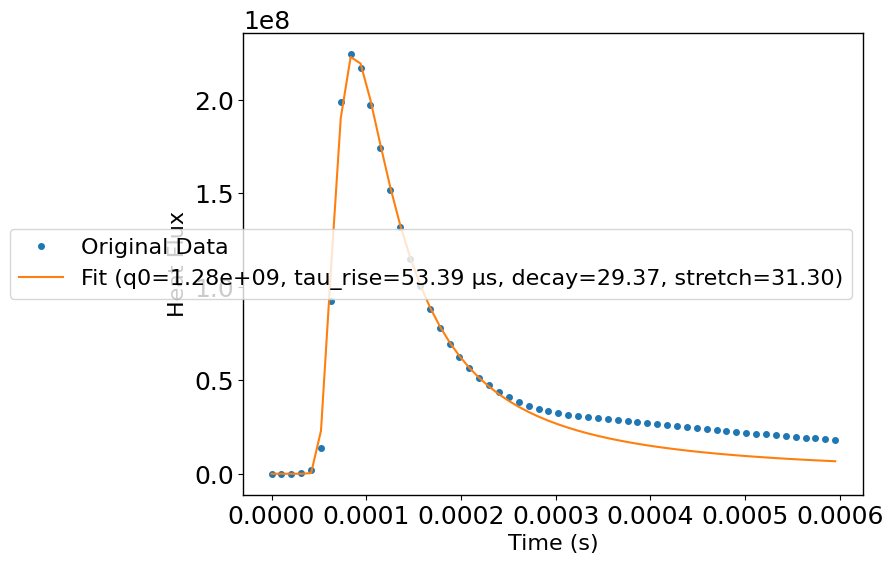

In [9]:
# Improved model with stretching
def elm_scaled(t, q0, tau_rise, decay, stretch=1.0):
    tau = tau_rise * 0.8
    return q0 * (1 + (tau / t)**2)**stretch * (tau / t)**2 * np.exp(-decay * (tau / t)**2)

# Initial guesses
p0 = (np.max(heatflux_80), 80e-6, 1.0, 1.0)

# Fit with weighting and truncated range
fit_range = t <= 2e-3  # Focus on pulse region
weights = 1 / np.sqrt(heatflux_80[fit_range] + 1e-9)
popt, pcov = curve_fit(elm_scaled, t[fit_range], heatflux_80[fit_range], p0=p0, sigma=weights, maxfev=20000)

# Extract parameters
q0_fit, tau_rise_fit, decay_fit, stretch_fit = popt

# Generate fitted curve
fitted_curve = elm_scaled(t, q0_fit, tau_rise_fit, decay_fit, stretch_fit)

# Plot results
plt.figure(figsize=(8, 6))
plt.plot(t, heatflux_80, label="Original Data", marker='o', linestyle='', markersize=4)
plt.plot(t, fitted_curve, label=f"Fit (q0={q0_fit:.2e}, tau_rise={tau_rise_fit*1e6:.2f} µs, decay={decay_fit:.2f}, stretch={stretch_fit:.2f})")
plt.xlabel("Time (s)")
plt.ylabel("Heat Flux")
plt.legend()
plt.grid()
plt.show()


# Working out flux expansion


[14.29500098]


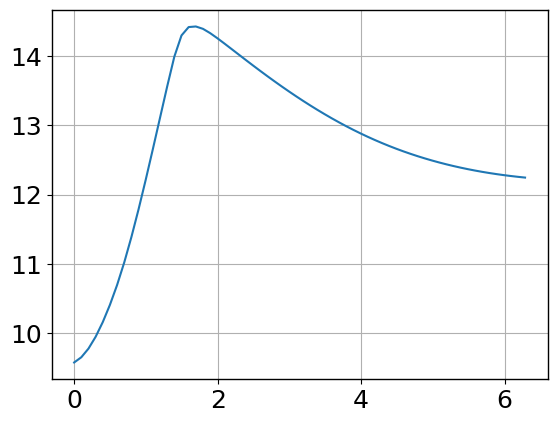

In [20]:
file_path = '/users/jlb647/scratch/simulation_program/hermes-3_sim/analysis/my_notebooks/notebooks/hermes-3/transients/1_D/presentation/B_total_data.txt'

output_path = './b_total_data.csv'

data = pd.read_csv(file_path, sep='\t')

data = data.dropna(axis=1, how="all")

B_xp = data.loc[data['x_par (m)'] == 118.83, 'B_total (T)'].values
print(B_xp)
# data['B_norm'= ]

data['x_par (m)'] = data['x_par (m)'] - data['x_par (m)'].min()
J = 1/(data['B_total (T)']/B_xp)
J += 1 - J.min()

# plt.plot(data['x_par (m)'], J, label='B_total/B_xp')
# plt.plot(data['x_par (m)'], data['B_total (T)'], label='B_total')

x = np.linspace(0,2*np.pi, len(data['B_total (T)']))
plt.plot(x, data['B_total (T)'], label='B_pol')


### Fitting it

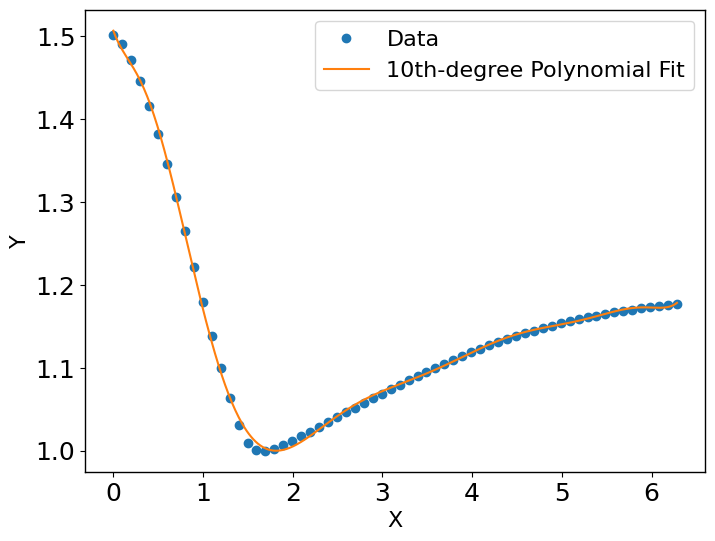

Coef 0: 1.506e+00
Coef 1: -2.992e-01
Coef 2: 9.224e-01
Coef 3: -2.761e+00
Coef 4: 3.098e+00
Coef 5: -1.793e+00
Coef 6: 6.096e-01
Coef 7: -1.270e-01
Coef 8: 1.597e-02
Coef 9: -1.116e-03
Coef 10: 3.332e-05


In [11]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.polynomial.polynomial import Polynomial

# Example data
y = J
x = np.linspace(0, 2*np.pi, len(J))  # Replace with your actual y data

# Define a 10th-degree polynomial function
def poly_func(x, *coefs):
    return sum(c * x**i for i, c in enumerate(coefs))

# Initial guesses for coefficients
initial_coefs = [1] * 11  # 11 coefficients for a 10th-degree polynomial

# Fit the data
from scipy.optimize import curve_fit

popt, _ = curve_fit(poly_func, x, y, p0=initial_coefs)

# Generate fitted data
x_fit = np.linspace(np.min(x), np.max(x), 500)
y_fit = poly_func(x_fit, *popt)

# Plot the data and the fit
plt.figure(figsize=(8, 6))
plt.plot(x, y, 'o', label='Data')
plt.plot(x_fit, y_fit, '-', label='10th-degree Polynomial Fit')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.grid()
plt.show()

# Print fitted coefficients
for i, coef in enumerate(popt):
    print(f"Coef {i}: {coef:.3e}")


# Transient animations

In [41]:
test = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/300%_fluence/power_and_density/FL/case_01')

(<Figure size 1000x600 with 2 Axes>,
 <Axes: xlabel='$S_{\\parallel}$ (m)', ylabel='Te, Ti (eV)'>)

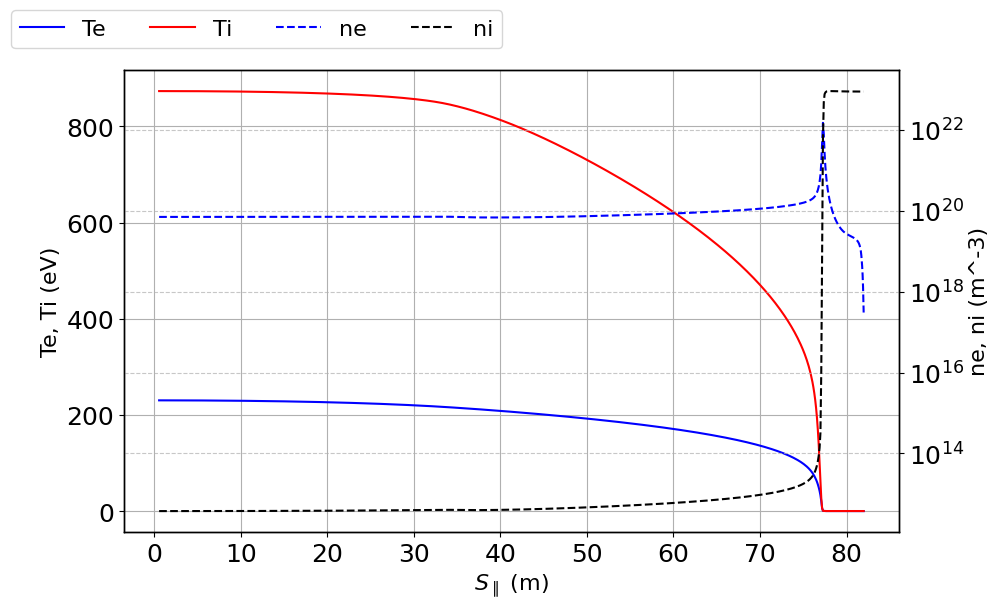

In [47]:
def te_ti_ne_nd(ds):
    # select last time step
    data = ds.isel(t=0)

    # Extract the data arrays
    Te = replace_guards(np.squeeze(data['Te'].values))
    Ti = replace_guards(np.squeeze(data['Td+'].values))
    ne = replace_guards(np.squeeze(data['Ne'].values))
    nd = replace_guards(np.squeeze(data['Nd'].values))
    y = data['y'].values[1:-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 6))
    ax2 = ax.twinx()

    ax.plot(y, Te, label='Te', color='blue')
    ax.plot(y, Ti, label='Ti', color='red')

    ax2.plot(y, ne, label='ne', color='blue' , linestyle='--')
    ax2.plot(y, nd, label='ni', color='black', linestyle='--')

    ax.set_ylabel('Te, Ti (eV)')
    ax2.set_ylabel('ne, ni (m^-3)')
    ax2.set_yscale('log')
    ax.set_xlabel(r'$S_{\parallel}$ (m)')
    ax2.grid(linestyle='--', which='major', alpha=0.7)

    fig.legend(loc = 'upper left', ncol=4)

    return fig, ax

te_ti_ne_nd(test)

In [48]:
snb_test = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/300%_fluence/power_and_density/SNB/base_01_steady_state_this_one')

(<Figure size 1000x600 with 2 Axes>,
 <Axes: xlabel='$S_{\\parallel}$ (m)', ylabel='Te, Ti (eV)'>)

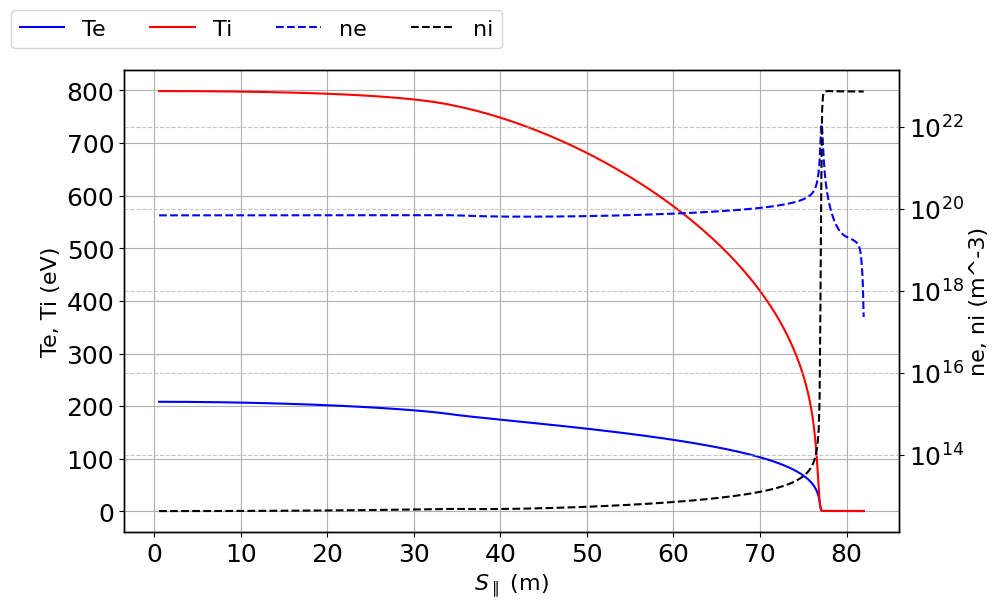

In [49]:
te_ti_ne_nd(snb_test)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip

def te_ti_ne_nd_animation(ds, output_file="te_ti_ne_nd_animation.mp4"):
    """
    Create an animation of Te, Ti, ne, nd profiles over time and save it as an MP4.

    Parameters:
    - ds: xarray Dataset containing the data
    - output_file: str, name of the output MP4 file
    """
    # Extract the time dimension
    times = ds['t'].values * 1e3
    times = (times-times[0]) - 0.5
    y = ds['y'].values[1:-1]

    def replace_guards(data):
        # Replace guard cells with NaN (example implementation)
        return data[1:-1]  # Replace with your specific logic

    # Calculate the fixed y-axis limits
    max_Te = -np.inf
    max_Ti = -np.inf
    max_ne = -np.inf
    max_nd = -np.inf

    for t_index in range(len(times)):
        data = ds.isel(t=t_index)
        Te = replace_guards(np.squeeze(data['Te'].values))
        Ti = replace_guards(np.squeeze(data['Td+'].values))
        ne = replace_guards(np.squeeze(data['Ne'].values))
        nd = replace_guards(np.squeeze(data['Nd'].values))
        max_Te = np.nanmax(Te)
        max_Ti = np.nanmax(Ti)
        max_ne = np.nanmax(ne)
        max_nd = np.nanmax(nd)

    # Extract the initial profiles for the semi-transparent trace
    initial_data = ds.isel(t=0)
    initial_Te = replace_guards(np.squeeze(initial_data['Te'].values))
    initial_Ti = replace_guards(np.squeeze(initial_data['Td+'].values))
    initial_ne = replace_guards(np.squeeze(initial_data['Ne'].values))
    initial_nd = replace_guards(np.squeeze(initial_data['Nd'].values))

    def make_frame(t_index):
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        ax2 = ax.twinx()

        # Extract data for the current time slice
        data = ds.isel(t=t_index)
        Te = replace_guards(np.squeeze(data['Te'].values))
        Ti = replace_guards(np.squeeze(data['Td+'].values))
        ne = replace_guards(np.squeeze(data['Ne'].values))
        nd = replace_guards(np.squeeze(data['Nd'].values))

        # Plot initial profiles as semi-transparent traces
        ax.plot(y, initial_Te, color='blue', alpha=0.5, linestyle='-')
        ax.plot(y, initial_Ti,  color='red', alpha=0.5, linestyle='-')
        ax2.plot(y, initial_ne, color='blue', alpha=0.5, linestyle='--')
        ax2.plot(y, initial_nd,  color='black', alpha=0.5, linestyle='--')

        # Plot profiles for the current time slice
        ax.plot(y, Te, label='Te', color='blue')
        ax.plot(y, Ti, label='Ti', color='red')
        ax2.plot(y, ne, label='ne', color='blue', linestyle='--')
        ax2.plot(y, nd, label='nd', color='black', linestyle='--')

        # Set axis limits
        ax.set_ylim(0, max(max_Te, max_Ti))
        ax2.set_ylim(1e14, max(max_ne, max_nd))

        # Set labels
        ax.set_ylabel('Te, Ti (eV)')
        ax2.set_ylabel('ne, nd (m^-3)')
        ax2.set_yscale('log')
        ax.set_xlabel(r'$S_{\parallel}$ (m)')
        ax.set_title(f'Time: {times[t_index]:.2e} ms')

        # Add legend
        fig.legend(loc='upper left')

        # Convert the figure to an image
        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)
        return img

    # Define the video duration and frame rate
    duration = len(times) / 10  # Assume 10 frames per second
    fps = 10

    # Create video using VideoClip
    def make_frame_video(t):
        t_index = int(t * fps)  # Get the frame index
        t_index = min(t_index, len(times) - 1)  # Ensure within bounds
        return make_frame(t_index)

    animation = VideoClip(make_frame_video, duration=duration)
    animation.write_videofile(output_file, fps=fps, codec="libx264")

    print(f"Animation saved to {output_file}")

# Example usage:
# Assuming `ds` is your dataset
# te_ti_ne_nd_animation(test, output_file="te_ti_ne_nd_animation_fixed_y_axis.mp4")


In [46]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip


def te_ti_ne_nd_animation(ds, output_file="te_ti_ne_nd_animation.mp4"):
    """
    Create an animation of Te, Ti, ne, nd profiles over time and save it as an MP4.

    Parameters:
    - ds: xarray Dataset containing the data
    - output_file: str, name of the output MP4 file
    """
    # Extract the time dimension as a numpy array
    times = ds['t'].values * 1e3  # Convert time to milliseconds
    times = (times-times[0]) - 0.5
    y = ds['y'].values[1:-1]

    def replace_guards(data):
        # Replace guard cells with NaN (example implementation)
        return data[1:-1]  # Replace with your specific logic

    # Calculate the fixed y-axis limits
    max_Te = -np.inf
    max_Ti = -np.inf
    max_ne = -np.inf
    max_nd = -np.inf

    for t_index in range(len(times)):
        data = ds.isel(t=t_index)
        Te = replace_guards(np.squeeze(data['Te'].values))
        Ti = replace_guards(np.squeeze(data['Td+'].values))
        ne = replace_guards(np.squeeze(data['Ne'].values))
        nd = replace_guards(np.squeeze(data['Nd'].values))

        max_Te = max(max_Te, np.nanmax(Te))
        max_Ti = max(max_Ti, np.nanmax(Ti))
        max_ne = max(max_ne, np.nanmax(ne))
        max_nd = max(max_nd, np.nanmax(nd))

    # Extract the initial profiles for the semi-transparent trace
    initial_data = ds.isel(t=0)
    initial_Te = replace_guards(np.squeeze(initial_data['Te'].values))
    initial_Ti = replace_guards(np.squeeze(initial_data['Td+'].values))
    initial_ne = replace_guards(np.squeeze(initial_data['Ne'].values))
    initial_nd = replace_guards(np.squeeze(initial_data['Nd'].values))

    def make_frame(t_index):
        fig, ax = plt.subplots(1, 1, figsize=(12, 6))
        ax2 = ax.twinx()

        # Extract data for the current time slice
        data = ds.isel(t=t_index)
        Te = replace_guards(np.squeeze(data['Te'].values))
        Ti = replace_guards(np.squeeze(data['Td+'].values))
        ne = replace_guards(np.squeeze(data['Ne'].values))
        nd = replace_guards(np.squeeze(data['Nd'].values))

        # Plot initial profiles as semi-transparent traces
        ax.plot(y, initial_Te, color='blue', alpha=0.5, linestyle='-')
        ax.plot(y, initial_Ti, color='red', alpha=0.5, linestyle='-')
        ax2.plot(y, initial_ne,  color='blue', alpha=0.5, linestyle='--')
        ax2.plot(y, initial_nd,  color='black', alpha=0.5, linestyle='--')

        # Plot profiles for the current time slice
        ax.plot(y, Te, label='Te', color='blue')
        ax.plot(y, Ti, label='Ti', color='red')
        ax2.plot(y, ne, label='ne', color='blue', linestyle='--')
        ax2.plot(y, nd, label='nd', color='black', linestyle='--')

        # Set axis limits
        ax.set_ylim(0, max(max_Te*1.1, max_Ti*1.1))
        ax2.set_ylim(1e14, max(max_ne*1.1, max_nd*1.1))

        # Set labels
        ax.set_ylabel('Te, Ti (eV)')
        ax2.set_ylabel('ne, ni (m^-3)')
        ax2.set_yscale('log')
        ax.set_xlabel(r'$S_{\parallel}$ (m)')
        ax.set_title(f'Time: {times[t_index]} ms')

        # Add legend
        fig.legend(loc='upper left', ncol=4)

        # Convert the figure to an image
        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)
        return img

    # Define the video duration and frame rate
    duration = len(times) / 10  # Assume 10 frames per second
    fps = 10

    # Create video using VideoClip
    def make_frame_video(t):
        t_index = int(t * fps)  # Get the frame index
        t_index = min(t_index, len(times) - 1)  # Ensure within bounds
        return make_frame(t_index)

    animation = VideoClip(make_frame_video, duration=duration)
    animation.write_videofile(output_file, fps=fps, codec="libx264")

    print(f"Animation saved to {output_file}")

# Example usage:
# te_ti_ne_nd_animation(ds, output_file="te_ti_ne_nd_animation.mp4")


In [23]:
FL_300 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/300%_fluence/power_and_density/FL/case_01')

In [30]:
FL_300_fast_pump = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/300%_fluence/power_and_density/FL/case_03_pump_1e-3')

In [31]:
te_ti_ne_nd_animation(FL_300_fast_pump, output_file="FL_300_fast_pump.mp4")

t:   0%|          | 1/301 [21:49<109:06:06, 1309.22s/it, now=None]

Moviepy - Building video FL_300_fast_pump.mp4.
Moviepy - Writing video FL_300_fast_pump.mp4



t:   0%|          | 1/301 [24:09<120:47:35, 1449.52s/it, now=None]

Moviepy - Done !
Moviepy - video ready FL_300_fast_pump.mp4
Animation saved to FL_300_fast_pump.mp4


In [161]:
import numpy as np
test_array = np.array([1, 2, np.nan, 4])
print(np.nanmax(test_array))  # Should print 4


4.0


In [42]:
FL_10x_den_long = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/transient/50%_fluence/case_04_125_rise_time_10x_density_200itr_restart')
FL_power_only = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/transient/50%_fluence/case_03_02_restart')
SNB_den_power = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/transient/50%_fluence/SNB/case_04_125_rise_time_10x_density')

In [150]:
FL_power_only = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/transient/50%_fluence/case_03_02_restart')


In [151]:
data_set = { 'FL_power_only': FL_power_only}

for key, ds in data_set.items():
    te_ti_ne_nd_animation(ds, output_file=f"{key}.mp4")

TypeError: 'DataArray' object is not callable

In [48]:
res = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_10/area_refactor/reservoir_tests/case_02_test_pulse')

In [50]:
te_ti_ne_nd_animation(res, output_file=f"res_fail.mp4")

Moviepy - Building video res_fail.mp4.
Moviepy - Writing video res_fail.mp4



Moviepy - Done !
Moviepy - video ready res_fail.mp4
Animation saved to res_fail.mp4


# Pump plotting

residence_time = 1E-1

lpar = ((2-mesh:dymin)^2 - (2 - mesh:dymin - ((1 - mesh:dymin) * y / pi))^2) / (4*(1-mesh:dymin)) * mesh:length

gradient = 1.0 / (mesh:length - mesh:length_xpt)
intercept = -mesh:length_xpt * gradient
sink_shape = clamp(gradient * lpar + intercept, 0.0, 1.0)


In [33]:
pump = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/base_case/FL/base_03_steady_state_this_one')

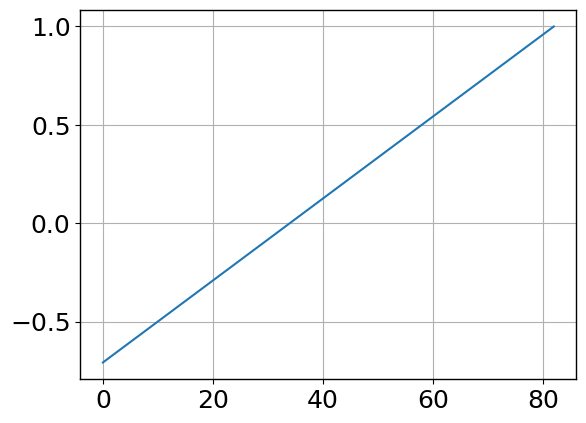

In [38]:
residence_time = 1E-1

length = 82           # Length of the domain in meters
length_xpt = 34 
dymin = 0.1

y = pump['y'].values
y = np.linspace(0, 2*np.pi, len(y))

lpar = ((2-dymin)**2 - (2 - dymin - ((1 - dymin) * y / np.pi))**2) / (4*(1-dymin)) * length

gradient = 1.0 / (length - length_xpt)
intercept = -length_xpt * gradient
sink_shape = gradient * lpar + intercept

# sink_shape = np.maximum(sink_shape, 0.0)


plt.plot(lpar,sink_shape)



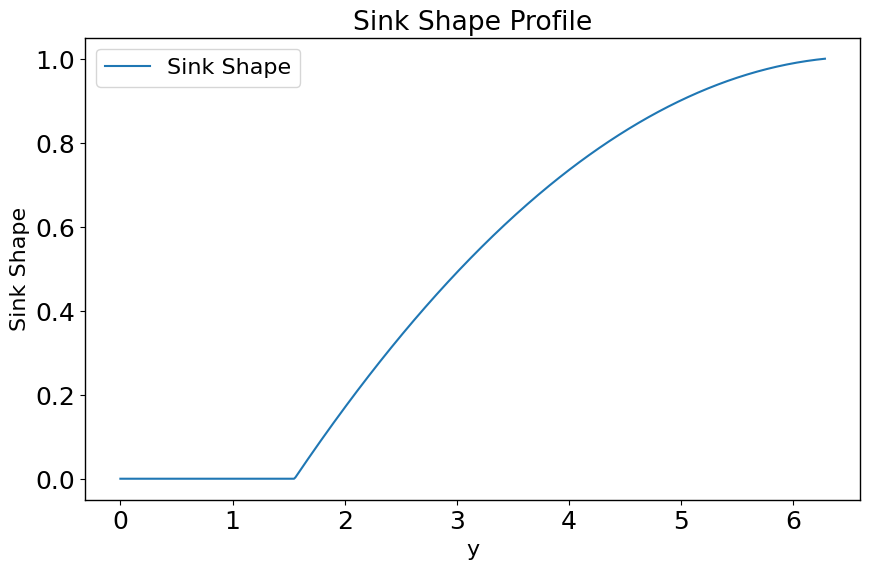

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
residence_time = 1E-1

mesh_length = 82           # Length of the domain in meters
mesh_length_xpt = 34 
mesh_dymin = 0.1
    # Small distance parameter
y = np.linspace(0, 2*np.pi, 500)

# Calculate lpar
lpar = ((2 - mesh_dymin)**2 - (2 - mesh_dymin - ((1 - mesh_dymin) * y / np.pi))**2) / (4 * (1 - mesh_dymin)) * mesh_length

# Calculate the sink shape
gradient = 1.0 / (mesh_length - mesh_length_xpt)
intercept = -mesh_length_xpt * gradient
sink_shape = np.clip(gradient * lpar + intercept, 0.0, 1.0)

# Plot the sink shape
plt.figure(figsize=(10, 6))
plt.plot(y, sink_shape, label="Sink Shape")
plt.title("Sink Shape Profile")
plt.xlabel("y")
plt.ylabel("Sink Shape")
plt.grid()
plt.legend()
plt.show()




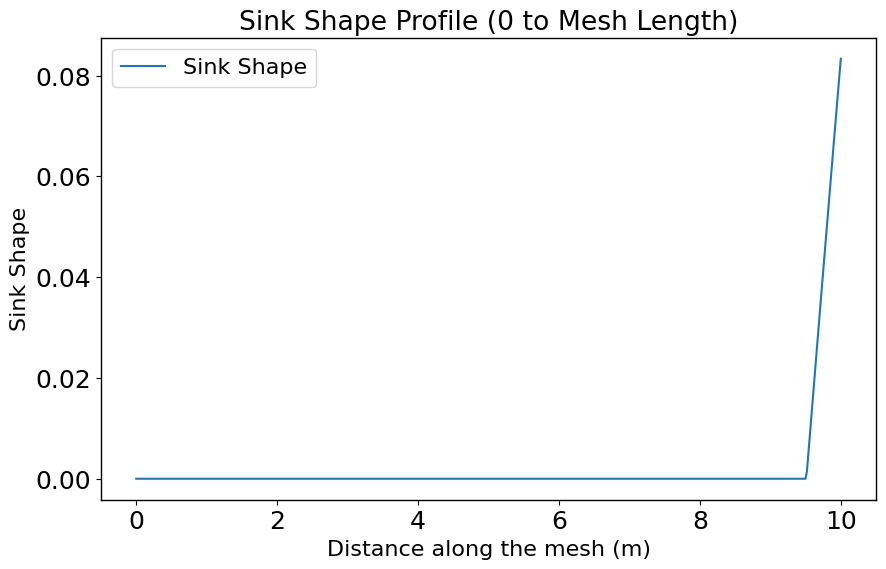

In [40]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
mesh_length = 10.0         # Total length of the mesh (arbitrary units)
mesh_length_xpt = 7.0      # Location of the X-point along the mesh
mesh_dymin = 0.1           # Small distance parameter
y = np.linspace(0, mesh_length, 500)  # y values now range from 0 to mesh length

# Calculate lpar
lpar = ((2 - mesh_dymin)**2 - (2 - mesh_dymin - ((1 - mesh_dymin) * y / mesh_length))**2) / (4 * (1 - mesh_dymin)) * mesh_length

# Calculate the sink shape
gradient = 1.0 / (mesh_length - mesh_length_xpt)
intercept = -mesh_length_xpt * gradient
sink_shape = np.clip(gradient * lpar + intercept, 0.0, 1.0)

# Plot the sink shape
plt.figure(figsize=(10, 6))
plt.plot(y, sink_shape, label="Sink Shape")
plt.title("Sink Shape Profile (0 to Mesh Length)")
plt.xlabel("Distance along the mesh (m)")
plt.ylabel("Sink Shape")
plt.grid()
plt.legend()
plt.show()


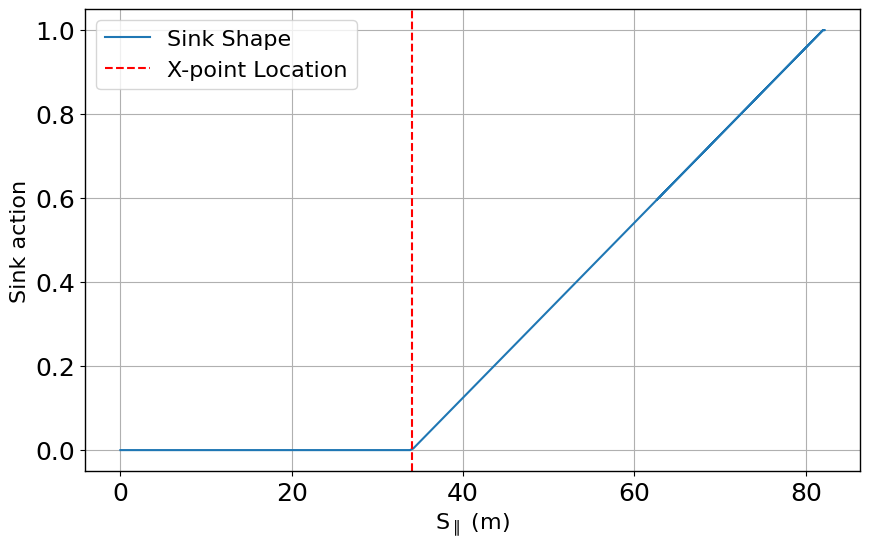

In [290]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
residence_time = 1E-1

mesh_length = 82           # Length of the domain in meters
mesh_length_xpt = 34       # X-point location
mesh_dymin = 0.1           # Small distance parameter

# Create y as a physical distance from 0 to mesh_length
y = np.linspace(0, mesh_length, 500)

# Calculate lpar
lpar = ((2 - mesh_dymin)**2 - (2 - mesh_dymin - ((1 - mesh_dymin) * y / mesh_length * np.pi))**2) / (4 * (1 - mesh_dymin)) * mesh_length

# Calculate the sink shape
gradient = 1.0 / (mesh_length - mesh_length_xpt)
intercept = -mesh_length_xpt * gradient
sink_shape = np.clip(gradient * lpar + intercept, 0.0, 1.0)

# Plot the sink shape
plt.figure(figsize=(10, 6))
plt.plot(lpar, sink_shape, label="Sink Shape")
# plt.title("Sink Shape Profile")
plt.xlabel(r"S$_{\parallel}$ (m)")
plt.axvline(mesh_length_xpt, color='red', linestyle='--', label="X-point Location")
plt.ylabel("Sink action")
plt.grid(True)
plt.legend()
plt.show()


# Comparison of Detachment front 

In [5]:
import numpy as np

def detachment_front_position(ds):
    """
    Calculate the detachment front position for each time step in the dataset.

    Parameters:
    ds (xarray.Dataset): The dataset containing 'Ne', 'Nd', 't', and 'y'.

    Returns:
    tuple: A tuple containing:
        - front_positions (np.ndarray): Detachment front positions for each time step.
        - front_indices (np.ndarray): Indices of the detachment front for each time step.
    """
    # Extract variables
    t = ds['t'].values
    # t -= t[0]  # Normalize time to start from 0
    # t *= 1e3  # Convert to milliseconds
    Ne = np.squeeze(ds['Ne'].values)  # Ensure correct dimensions
    Nd = np.squeeze(ds['Nd'].values)
    y = ds['y'].values[1:-1]  # Exclude guard cells

    # Initialize an array to store detachment front indices
    front_indices = np.zeros(len(t), dtype=int)  # Use int for indices

    # Loop over each time step and find the index where Nd > Ne
    for i in range(len(t)):
        detachment_mask = Nd[i, :] > Ne[i, :]  # Create mask for Nd > Ne
        if np.any(detachment_mask):  # Check if any value satisfies the condition
            front_indices[i] = np.argmax(detachment_mask)  # Find the first index
        else:
            front_indices[i] = -1  # Set to -1 if no detachment is found

    # Calculate detachment front positions relative to y[-1]
    front_positions = np.where(front_indices >= 0, y[-1] - y[front_indices], np.nan)

    return front_positions, front_indices


### SNB vs FL 100 % fluence

In [8]:
FL_100 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/50%_fluence/power_and_density/FL/case_01')
SNB_100 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/50%_fluence/power_and_density/SNB/case_01')

[4.5131775 4.5131775 4.5131775 4.5131775 4.5131775 4.5131775 3.7919875
 2.67197   1.61335   0.505325  0.5433525 0.9271125 0.835375  0.5433525
 0.7473275 1.0716375 1.224465  1.224465  1.1726    1.1216575 1.224465
 1.385595  1.5550275 1.7327625 1.855865  1.9826575 2.0474375 2.179765
 2.179765  2.2473125 2.385175  2.45549   2.5267275 2.67197   2.745975
 2.8967525 2.973525  2.973525  3.05122   3.05122   3.1298375 3.1298375
 3.1298375 3.1298375 3.1298375 3.1298375 3.1298375 3.1298375 3.1298375
 3.1298375 3.1298375 3.1298375 3.1298375 3.1298375 3.1298375 3.1298375
 3.2093775 3.2093775 3.2093775 3.2093775 3.2093775 3.2093775 3.28984
 3.28984   3.28984   3.28984   3.28984   3.28984   3.28984   3.28984
 3.28984   3.28984   3.371225  3.371225  3.371225  3.371225  3.371225
 3.371225  3.371225  3.371225  3.371225  3.4535325 3.4535325 3.4535325
 3.5367625 3.620915  3.620915  3.70599   3.7919875 3.8789075 3.8789075
 3.96675   4.055515  4.1452025 4.2358125 4.2358125 4.2358125 4.2358125
 4.2358125 4.1

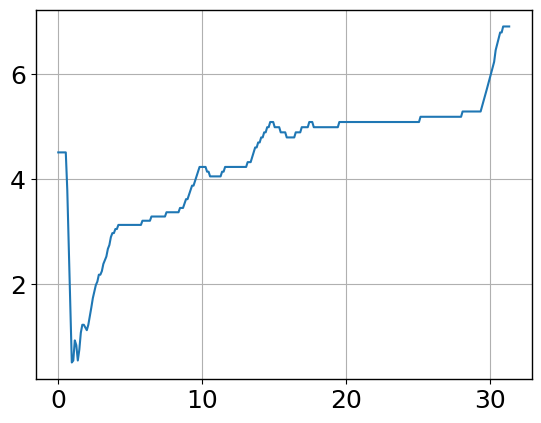

In [121]:
import numpy as np

# Extract variables
t = FL_100['t'].values
t -= t[0]  # Normalize time to start from 0
t *= 1e3  # Convert to milliseconds
Ne = np.squeeze(FL_100['Ne'].values)  # Ensure correct dimensions
Nd = np.squeeze(FL_100['Nd'].values)
y = FL_100['y'].values[1:-1]  # Exclude guard cells

# Initialize an array to store detachment front positions
front_indices = np.zeros(len(t), dtype=int)  # Use int for indices

# Loop over each time step and find the index where Nd > Ne
for i in range(len(t)):
    detachment_mask = Nd[i, :] > Ne[i, :]  # Create mask for Nd > Ne
    if np.any(detachment_mask):  # Check if any value satisfies the condition
        front_indices[i] = np.argmax(detachment_mask)  # Find the first index
    else:
        front_indices[i] = -1  # Set to -1 if no detachment is found

front_location = y[-1] - y[front_indices]  # Calculate
print(front_location)

# Print results
print(front_indices)


plt.plot(t, front_location)


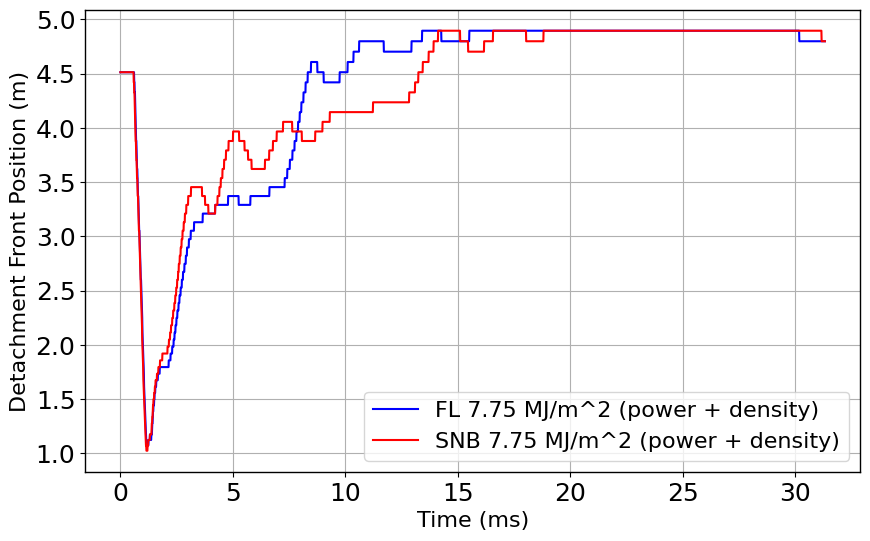

In [11]:
det_FL = detachment_front_position(FL_100)
det_SNB = detachment_front_position(SNB_100)

time = SNB_100['t'].values
time -= time[0]  # Normalize time to start from 0
# time *= 1e3  # Convert to milliseconds
time_milli = time * 1e3

plt.figure(figsize=(10, 6))
plt.plot(time_milli, det_FL[0], label="FL 7.75 MJ/m^2 (power + density)", color = 'blue')
plt.plot(time_milli, det_SNB[0], label="SNB 7.75 MJ/m^2 (power + density)", color = 'red')
# plt.xlim(0,15)
plt.xlabel("Time (ms)")
plt.ylabel("Detachment Front Position (m)")
plt.legend()

### FL power and density vs power only 

In [10]:
FL_100_density = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/50%_fluence/power_and_density/FL/case_01')
FL_100_power_only = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/50%_fluence/power_only/FL/case_01')
SNB_100_density = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/50%_fluence/power_and_density/SNB/case_01')

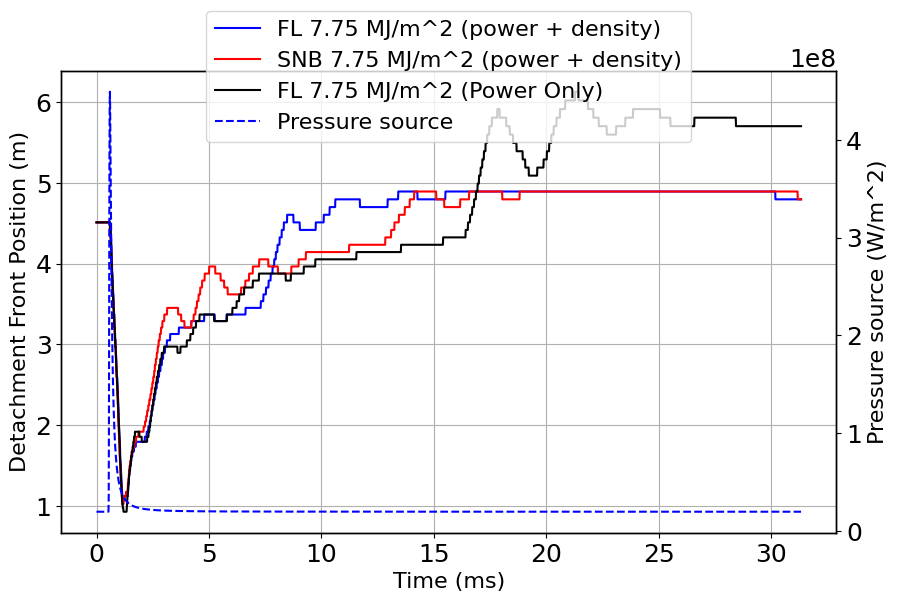

In [21]:
det_FL_density = detachment_front_position(FL_100_density)
det_FL_power_only = detachment_front_position(FL_100_power_only)

source_100_density = np.squeeze(FL_100_density['Pe_src'].values)[:, 0]
source_100_power_only = np.squeeze(FL_100_power_only['Pe_src'].values)[:, 0]
source_SNB = np.squeeze(SNB_100['Pe_src'].values)[:, 0]


time = FL_100_density['t'].values
time -= time[0]  # Normalize time to start from 0
time_milli = time * 1e3

fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax2 = ax.twinx()
ax2.grid(False)
ax2.plot(time_milli, source_100_density, color = 'blue', linestyle='--', label = 'Pressure source')
# ax.plot(time_milli, source_100_power_only, color = 'black')
# ax2.plot(time_milli, source_SNB, color = 'red')

ax2.set_ylabel("Pressure source (W/m^2)")

# ax[0].figure(figsize=(10, 6))
ax.plot(time_milli, det_FL_density[0], label="FL 7.75 MJ/m^2 (power + density)", color = 'blue')
ax.plot(time_milli, det_SNB[0], label="SNB 7.75 MJ/m^2 (power + density)", color = 'red')
ax.plot(time_milli, det_FL_power_only[0], label="FL 7.75 MJ/m^2 (Power Only)", color = 'black')

ax.set_xlabel("Time (ms)")
# ax.set_xbound(0, 15)
ax.set_ylabel("Detachment Front Position (m)")
fig.legend(loc = 'upper center')


### det front vs fluence

In [3]:
FL_50 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/50%_fluence/power_and_density/FL/case_01')
FL_100 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/100%_fluence/power_and_density/FL/case_01')
FL_150 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/150%_fluence/power_and_density/FL/case_01')
FL_200 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/200%_fluence/power_and_density/FL/case_01')
FL_250 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/250%_fluence/power_and_density/FL/case_01')
FL_300 = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week11_production/power_pulse/300%_fluence/power_and_density/FL/case_01')


In [6]:
det_50 = detachment_front_position(FL_50)
det_100 = detachment_front_position(FL_100)
det_150 = detachment_front_position(FL_150)
det_200 = detachment_front_position(FL_200)
det_250 = detachment_front_position(FL_250)
det_300 = detachment_front_position(FL_300)



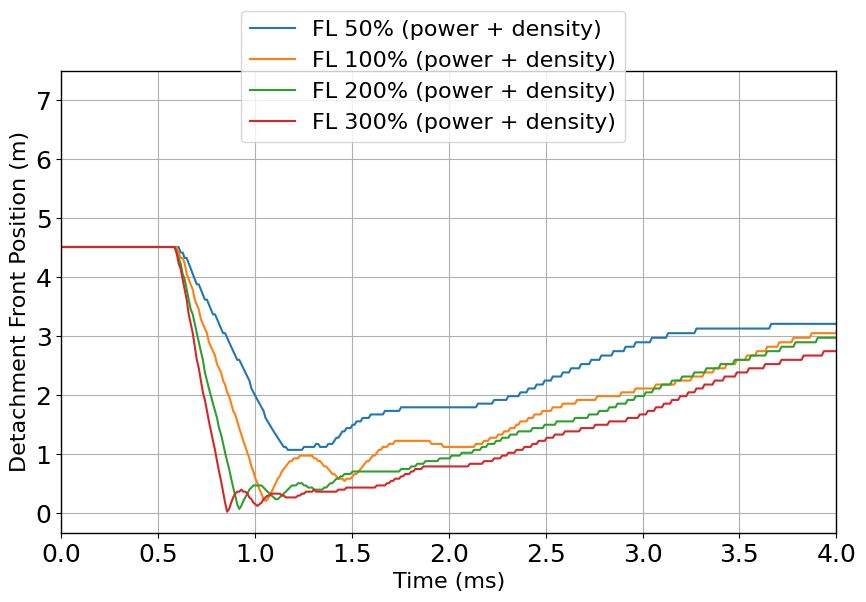

In [8]:
time = FL_150['t'].values
time -= time[0]  # Normalize time to start from 0
time_milli = time * 1e3

fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax.plot(time_milli, det_50[0], label="FL 50% (power + density)")
ax.plot(time_milli, det_100[0], label="FL 100% (power + density)")
# ax.plot(time_milli, det_150[0], label="FL 150% (power + density)")
ax.plot(time_milli, det_200[0], label="FL 200% (power + density)")
# ax.plot(time_milli[:len(det_200[0])], det_200[0], label="FL 200% (power + density)", color = 'red')
# ax.plot(time_milli, det_250[0], label="FL 250% (power + density)")
ax.plot(time_milli, det_300[0], label="FL 300% (power + density)")
ax.set_xbound(0, 4)
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Detachment Front Position (m)")

fig.legend(loc = 'upper center')


Maximum velocity 100%: 16.03329065351133 km/ms
Maximum velocity 200%: 17.280215278723713 km/ms
Maximum velocity 300%: 21.664088075306005 km/ms


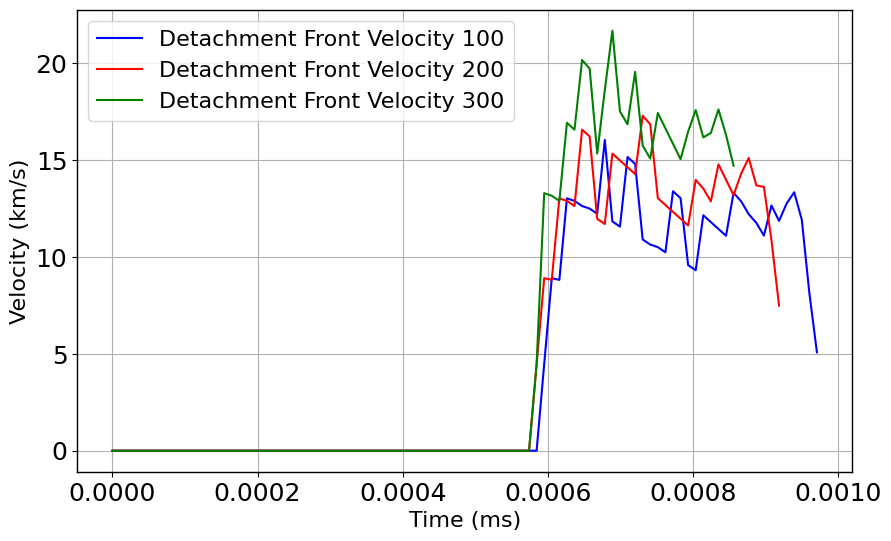

In [37]:
import numpy as np

def calculate_detachment_velocity(time, front_positions):
    """
    Calculate the velocity of the detachment front during its reduction phase.

    Parameters:
    - time (np.ndarray): Time array (e.g., in milliseconds).
    - front_positions (np.ndarray): Detachment front position array (e.g., in meters).

    Returns:
    - velocities (np.ndarray): Velocity array (in meters/ms).
    """
    # Find the index of the minimum detachment front position
    min_index = np.argmin(front_positions)

    # Extract time and positions up to the minimum
    time_reduction = time[:min_index + 1]
    front_reduction = front_positions[:min_index + 1]

    # Calculate the velocity (central difference method)
    velocities = np.gradient(front_reduction, time_reduction)

    return time_reduction, velocities

# Example usage
# Assume `time` and `front_positions` are arrays containing your data
time = FL_100['t'].values  # Replace with your time data
time -= time[0]  # Normalize time to start from 0
time_milli = time * 1e3
det_100 = detachment_front_position(FL_100)
det_200 = detachment_front_position(FL_200)
det_300 = detachment_front_position(FL_300)



Td = FL_150['Td+'].values
Td = np.squeeze(Td)

# Get the velocity data
time_reduction_100, velocities_100 = calculate_detachment_velocity(time, det_150[0])
time_reduction_200, velocities_200 = calculate_detachment_velocity(time, det_200[0])
time_reduction_300, velocities_300 = calculate_detachment_velocity(time, det_300[0])

velocities_100 *= -1

velocities_200 *= -1
velocities_300 *= -1
# Plot the velocity
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(10, 6))

print(f'Maximum velocity 100%: {np.max(velocities_100*1e-3)} km/ms')
print(f'Maximum velocity 200%: {np.max(velocities_200*1e-3)} km/ms')
print(f'Maximum velocity 300%: {np.max(velocities_300*1e-3)} km/ms')

ax.plot(time_reduction_100, velocities_100*1e-3, label="Detachment Front Velocity 100", color='blue')
ax.plot(time_reduction_200, velocities_200*1e-3, label="Detachment Front Velocity 200", color='red')
ax.plot(time_reduction_300, velocities_300*1e-3, label="Detachment Front Velocity 300", color='green')
ax.set_xlabel("Time (ms)")
ax.set_ylabel("Velocity (km/s)")

ax.legend()
plt.show()


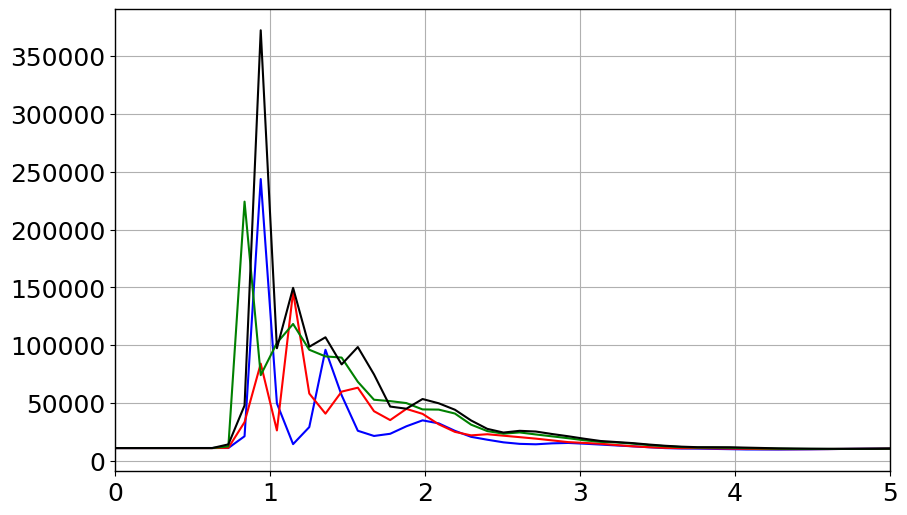

In [235]:
neutral_pressure_100 = np.squeeze(FL_100['Pd'].values)[:, -1]
neutral_pressure_150 = np.squeeze(FL_150['Pd'].values)[:, -1]
neutral_pressure_200 = np.squeeze(FL_200['Pd'].values)[:, -1]
neutral_pressure_250 = np.squeeze(FL_250['Pd'].values)[:, -1]
neutral_pressure_300 = np.squeeze(FL_300['Pd'].values)[:, -1]

fig,ax = plt.subplots(1,1 , figsize=(10, 6))
ax.grid(True)
ax.plot(time_milli, neutral_pressure_100, color = 'blue', label = 'Neutral Pressure')
ax.plot(time_milli, neutral_pressure_150, color = 'red', label = 'Neutral Pressure')
# ax2.plot(time_milli[:len(neutral_pressure_200)], neutral_pressure_200, color = 'red', linestyle='--')
ax.plot(time_milli, neutral_pressure_250, color = 'green')
ax.plot(time_milli, neutral_pressure_300, color = 'black')
ax.set_xbound(0,5)

In [38]:
import numpy as np
import matplotlib.pyplot as plt
from moviepy.editor import VideoClip

def te_ti_ne_nd_with_detachment_animation(ds, front_positions, output_file="te_ti_ne_nd_detachment.mp4"):
    """
    Create an animation of Te, Ti, ne, nd profiles with detachment front position 
    over time and save it as an MP4.

    Parameters:
    - ds: xarray Dataset containing the data.
    - front_positions: Detachment front positions (array of floats, same length as time steps).
    - output_file: str, name of the output MP4 file.
    """
    # Extract the time and y dimension
    times = ds['t'].values * 1e3  # Convert to milliseconds
    times -= times[0]  # Normalize time to start from 0
    y = ds['y'].values[1:-1]

    def replace_guards(data):
        return data[1:-1]  # Example to remove guard cells

    # Calculate the fixed y-axis limits for the profiles
    max_Te = -np.inf
    max_Ti = -np.inf
    max_ne = -np.inf
    max_nd = -np.inf

    for t_index in range(len(times)):
        data = ds.isel(t=t_index)
        Te = replace_guards(np.squeeze(data['Te'].values))
        Ti = replace_guards(np.squeeze(data['Td+'].values))
        ne = replace_guards(np.squeeze(data['Ne'].values))
        nd = replace_guards(np.squeeze(data['Nd'].values))
        max_Te = max(max_Te, np.nanmax(Te))
        max_Ti = max(max_Ti, np.nanmax(Ti))
        max_ne = max(max_ne, np.nanmax(ne))
        max_nd = max(max_nd, np.nanmax(nd))

    # Extract the initial profiles for the semi-transparent trace
    initial_data = ds.isel(t=0)
    initial_Te = replace_guards(np.squeeze(initial_data['Te'].values))
    initial_Ti = replace_guards(np.squeeze(initial_data['Td+'].values))
    initial_ne = replace_guards(np.squeeze(initial_data['Ne'].values))
    initial_nd = replace_guards(np.squeeze(initial_data['Nd'].values))

    # Define the frame generation function
    def make_frame(t_index):
        fig, axes = plt.subplots(2, 1, figsize=(12, 12), gridspec_kw={'height_ratios': [3, 1]})
        ax, ax_detachment = axes
        ax2 = ax.twinx()

        # Extract data for the current time slice
        data = ds.isel(t=t_index)
        Te = replace_guards(np.squeeze(data['Te'].values))
        Ti = replace_guards(np.squeeze(data['Td+'].values))
        ne = replace_guards(np.squeeze(data['Ne'].values))
        nd = replace_guards(np.squeeze(data['Nd'].values))

        # Plot initial profiles as semi-transparent traces
        ax.plot(y, initial_Te, color='blue', alpha=0.5, linestyle='-')
        ax.plot(y, initial_Ti, color='red', alpha=0.5, linestyle='-')
        ax2.plot(y, initial_ne, color='blue', alpha=0.5, linestyle='--')
        ax2.plot(y, initial_nd, color='black', alpha=0.5, linestyle='--')

        # Plot profiles for the current time slice
        ax.plot(y, Te, label='Te', color='blue')
        ax.plot(y, Ti, label='Ti', color='red')
        ax2.plot(y, ne, label='ne', color='blue', linestyle='--')
        ax2.plot(y, nd, label='nd', color='black', linestyle='--')

        # Set axis limits
        ax.set_ylim(0, 2e3)
        ax2.set_ylim(1e14, max(max_ne, max_nd))

        # Set labels
        ax.set_ylabel('Te, Ti (eV)')
        ax2.set_ylabel('ne, nd (m^-3)')
        ax2.set_yscale('log')
        ax2.grid(True, linestyle=':')
        ax.set_xlabel(r'$S_{\parallel}$ (m)')
        ax.set_title(f'Time: {times[t_index]:.2f} ms')

        # Plot detachment front position on the second row
        ax_detachment.plot(times, front_positions, label="Detachment Front Position", color="blue")
        ax_detachment.axvline(times[t_index], color='red', linestyle='--', label="Current Time Step")

        # Set detachment plot labels
        ax_detachment.set_ylabel("Detachment Front Position (m)")
        ax_detachment.set_xlabel("Time (ms)")
        
        ax_detachment.legend(loc='upper left')

        # Add legend for the top row
        ax.legend(loc='upper left')

        # Convert the figure to an image
        fig.tight_layout()
        fig.canvas.draw()
        img = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
        plt.close(fig)
        return img

    # Define the video duration and frame rate
    duration = len(times) / 10  # Assume 10 frames per second
    fps = 5

    # Create video using VideoClip
    def make_frame_video(t):
        t_index = int(t * fps)  # Get the frame index
        t_index = min(t_index, len(times) - 1)  # Ensure within bounds
        return make_frame(t_index)

    animation = VideoClip(make_frame_video, duration=duration)
    animation.write_videofile(output_file, fps=fps, codec="libx264")

    print(f"Animation saved to {output_file}")

# Example usage:
# front_positions, _ = detachment_front_position(FL_100)
# te_ti_ne_nd_with_detachment_animation(FL_100, front_positions, output_file="te_ti_ne_nd_detachment.mp4")


In [39]:
old_case = xh.open('/users/jlb647/scratch/simulation_program/hermes-3_sim/simulation_dir/2024-11_week_11_final/Transient/100%_fluence/power_and_density/FL/case_01')

In [40]:
front_positions, _ = detachment_front_position(old_case)

In [41]:
te_ti_ne_nd_with_detachment_animation(old_case, front_positions, output_file="te_ti_ne_nd_detachment.mp4")

Moviepy - Building video te_ti_ne_nd_detachment.mp4.
Moviepy - Writing video te_ti_ne_nd_detachment.mp4



Moviepy - Done !
Moviepy - video ready te_ti_ne_nd_detachment.mp4
Animation saved to te_ti_ne_nd_detachment.mp4
